In [3]:
from utils import *

grid_rf = {
    'n_estimators': [100, 200, 300],
     'max_depth': [10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

grid_xgb = {
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'max_leaves': [5, 20, 100]
}

# Caso
caso = 'julieta'

dataset = pd.read_csv(f'output_{caso}_v2.csv')
dataset = dataset.dropna()
dataset = dataset.drop(columns=["Unnamed: 0", "ID", "Sección"])
dataset["comment_Ind1"] = dataset["comment_Ind1"].apply(remove_stopwords)
dataset["comment_Grup"] = dataset["comment_Grup"].apply(remove_stopwords)
dataset["comment_Ind2"] = dataset["comment_Ind2"].apply(remove_stopwords)
dataset

sel_Ind1                                       comment_Ind1  sel_Grup  \
0           6  primera instancia individual , estudiante valo...         4   
1           6  primera instancia individual , estudiante valo...         4   
2           3  primera instancia individual , estudiante valo...         4   
3           3  primera instancia individual , estudiante valo...         5   
4           1  primera instancia individual , estudiante valo...         2   
..        ...                                                ...       ...   
732         4  primera instancia individual , estudiante valo...         4   
733         4  primera instancia individual , estudiante valo...         4   
734         6  primera instancia individual , estudiante valo...         4   
735         6  primera instancia individual , estudiante valo...         3   
736         2  primera instancia individual , estudiante valo...         5   

                                          comment_Grup  sel_Ind2  \
0    instancia grupal , grupo llega acuerdo valoriz...         4   
1    instancia grupal , grupo valora opción 4 , arg...         4   
2    instancia grupal , grupo valora misma opción 4...         4   
3    instancia grupal , grupo valora opción usar in...         4   
4    instancia grupal , grupo valora opción 2 justi...         2   
..                                                 ...       ...   
732  instancia grupal , estudiante mantiene misma v...         4   
733  instancia grupal , estudiante mantiene misma v...         3   
734  instancia grupal , grupo llega acuerdo valoriz...         5   
735  instancia grupal , grupo valora misma opción 3...         4   
736  instancia grupal , estudiante cambia postura v...         3   

                                          comment_Ind2  
0    segunda instancia individual , estudiante mant...  
1    segunda instancia individual , estudiante vuel...  
2    segunda instancia individual , estudiante vuel...  
3    segunda instancia individual , estudiante valo...  
4    segunda instancia individual , estudiante vuel...  
..                                                 ...  
732  segunda instancia individual , estudiante vuel...  
733  segunda instancia individual , estudiante dism...  
734  segunda instancia individual , estudiante valo...  
735  segunda instancia individual , estudiante valo...  
736  segunda instancia individual , estudiante vuel...  

[736 rows x 6 columns]

# Modelos clásicos

## Modelo base

In [4]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=False, 
    comment_Ind2=True, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  Ind1__1  Ind1__2  Ind1__3  Ind1__4  Ind1__5  Ind1__6  \
686       4.0       3.0        0        0        0        0        1        0   
556       4.0       3.0        0        0        0        0        1        0   
229       3.0       3.0        0        0        0        1        0        0   
479       5.0       4.0        0        0        0        0        0        1   
695       2.0       4.0        0        0        1        0        0        0   
..        ...       ...      ...      ...      ...      ...      ...      ...   
284       4.0       3.0        0        0        0        0        1        0   
55        1.0       4.0        0        1        0        0        0        0   
543       5.0       4.0        0        0        0        0        0        1   
653       4.0       4.0        0        0        0        0        1        0   
148       1.0       2.0        0        1        0        0        0        0   

     Ind1__acces  Ind1__accion  ...  Ind2__vid  Ind2__viend  Ind2__vio  \
686            0             0  ...          0            0          0   
556            0             0  ...          0            0          0   
229            0             0  ...          0            0          0   
479            0             0  ...          0            0          0   
695            0             0  ...          0            0          0   
..           ...           ...  ...        ...          ...        ...   
284            0             0  ...          0            0          0   
55             0             0  ...          0            0          0   
543            0             0  ...          0            0          0   
653            0             0  ...          0            0          0   
148            0             0  ...          0            0          0   

     Ind2__vision  Ind2__vist  Ind2__volv  Ind2__vot  Ind2__vuelv  \
686             0           0           0          0            1   
556             0           0           0          0            1   
229             0           0           0          0            1   
479             0           0           0          0            1   
695             0           0           0          0            1   
..            ...         ...         ...        ...          ...   
284             0           0           0          0            1   
55              0           0           0          0            0   
543             0           0           0          0            1   
653             0           0           0          0            1   
148             0           0           0          0            1   

     Ind2__whatsapp  Ind2__whatsappn  
686               1                0  
556               1                0  
229               0                0  
479               1                0  
695               0                0  
..              ...              ...  
284               1                0  
55                1                0  
543               1                0  
653               1                0  
148               0                0  

[588 rows x 1660 columns]

In [5]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2'])])

In [6]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000013201E9FA90>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000013201E9FA90>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000013201E9FA90>),
                                 'comment_Ind2')])

In [7]:
df_train

sel_Ind1  sel_Grup  Ind1__1  Ind1__2  Ind1__3  Ind1__4  Ind1__5  Ind1__6  \
686       4.0       3.0        0        0        0        0        1        0   
556       4.0       3.0        0        0        0        0        1        0   
229       3.0       3.0        0        0        0        1        0        0   
479       5.0       4.0        0        0        0        0        0        1   
695       2.0       4.0        0        0        1        0        0        0   
..        ...       ...      ...      ...      ...      ...      ...      ...   
284       4.0       3.0        0        0        0        0        1        0   
55        1.0       4.0        0        1        0        0        0        0   
543       5.0       4.0        0        0        0        0        0        1   
653       4.0       4.0        0        0        0        0        1        0   
148       1.0       2.0        0        1        0        0        0        0   

     Ind1__acces  Ind1__accion  ...  Ind2__vid  Ind2__viend  Ind2__vio  \
686            0             0  ...          0            0          0   
556            0             0  ...          0            0          0   
229            0             0  ...          0            0          0   
479            0             0  ...          0            0          0   
695            0             0  ...          0            0          0   
..           ...           ...  ...        ...          ...        ...   
284            0             0  ...          0            0          0   
55             0             0  ...          0            0          0   
543            0             0  ...          0            0          0   
653            0             0  ...          0            0          0   
148            0             0  ...          0            0          0   

     Ind2__vision  Ind2__vist  Ind2__volv  Ind2__vot  Ind2__vuelv  \
686             0           0           0          0            1   
556             0           0           0          0            1   
229             0           0           0          0            1   
479             0           0           0          0            1   
695             0           0           0          0            1   
..            ...         ...         ...        ...          ...   
284             0           0           0          0            1   
55              0           0           0          0            0   
543             0           0           0          0            1   
653             0           0           0          0            1   
148             0           0           0          0            1   

     Ind2__whatsapp  Ind2__whatsappn  
686               1                0  
556               1                0  
229               0                0  
479               1                0  
695               0                0  
..              ...              ...  
284               1                0  
55                1                0  
543               1                0  
653               1                0  
148               0                0  

[588 rows x 1660 columns]

In [8]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57        59
         0.0       0.00      0.00      0.00        56
         1.0       0.00      0.00      0.00        33

    accuracy                           0.40       148
   macro avg       0.13      0.33      0.19       148
weighted avg       0.16      0.40      0.23       148

Random Forest classifier
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

        -1.0       0.90      0.88      0.89        59
         0.0       0.78      0.89      0.83        56
         1.0       0.92      0.73      0.81        33

    accuracy                           0.85       148
   macro avg       0.87      0.83      0.85       148
weighted avg       0.86      0.85      0.85       148

XGBoost classifier
Best Hyperparameters: {'max_leaves': 5, 'min_child_weight': 1, 'n_est

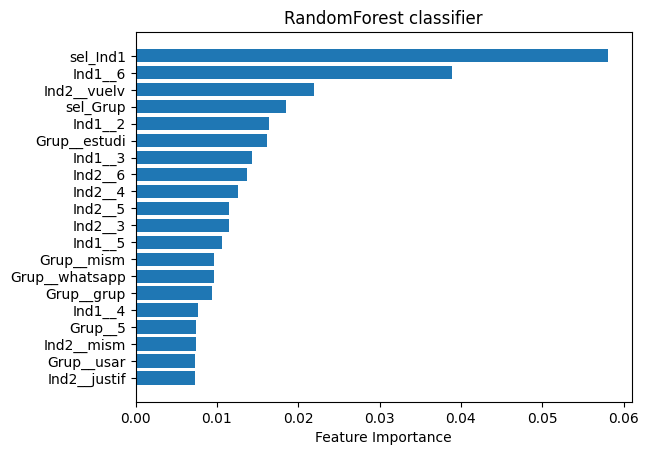

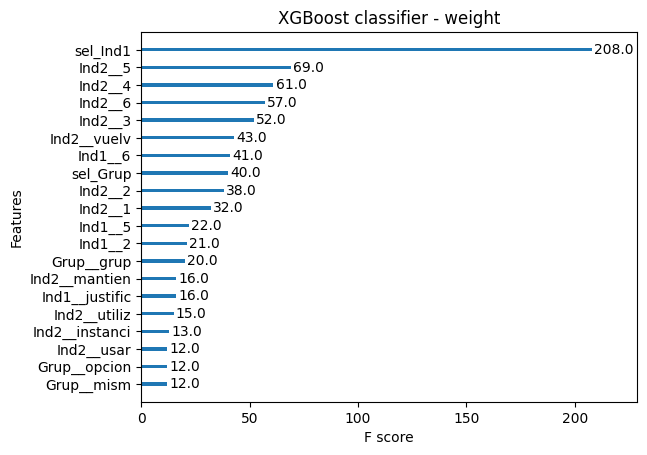

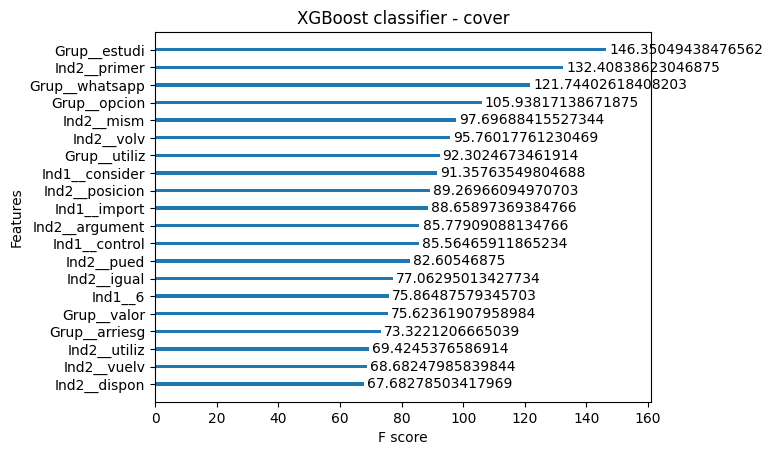

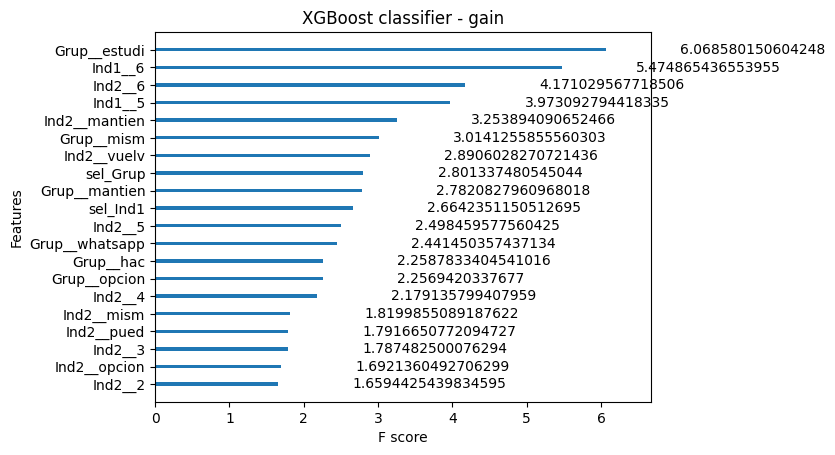

In [9]:
plot_importance_models(rf_best_model, xgb_best_model)

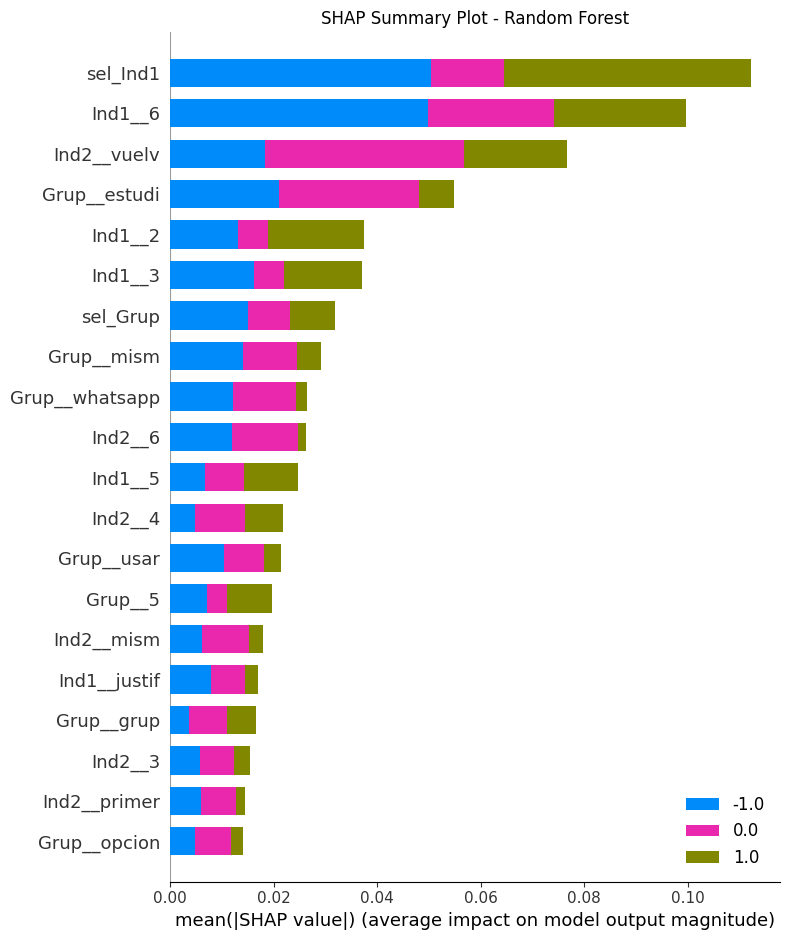

In [10]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[19:08:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


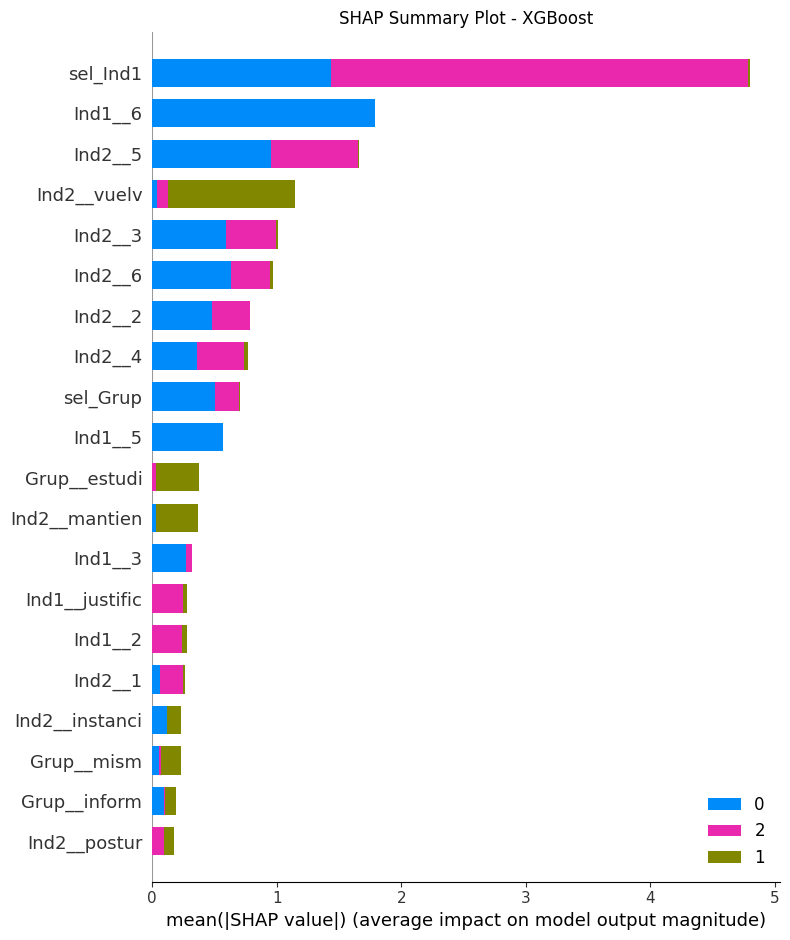

In [11]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

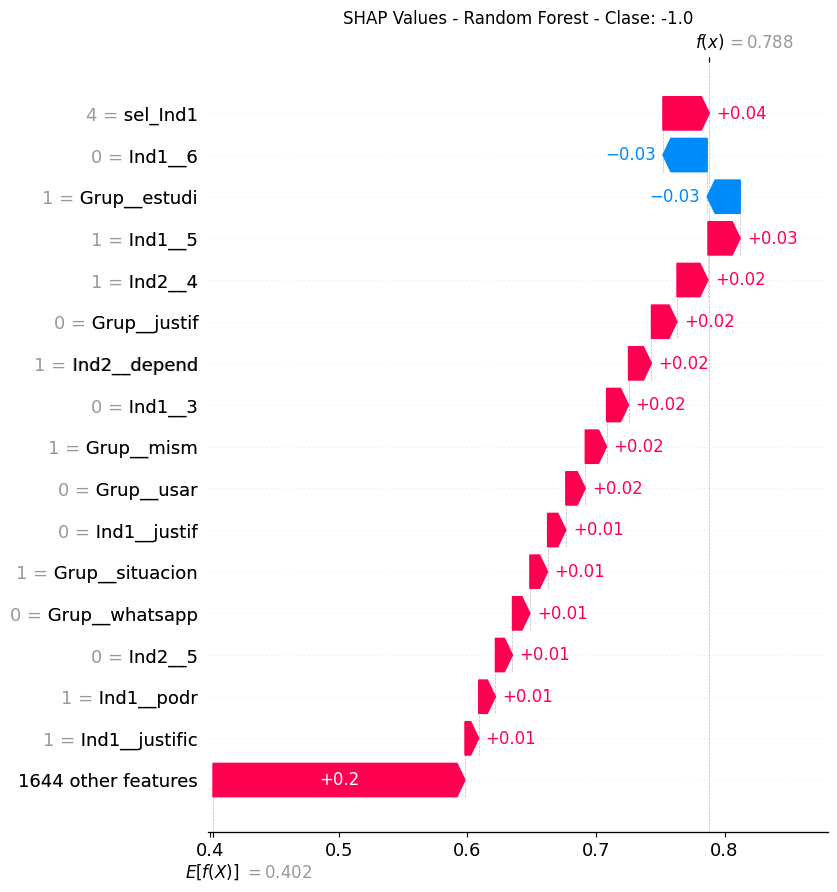

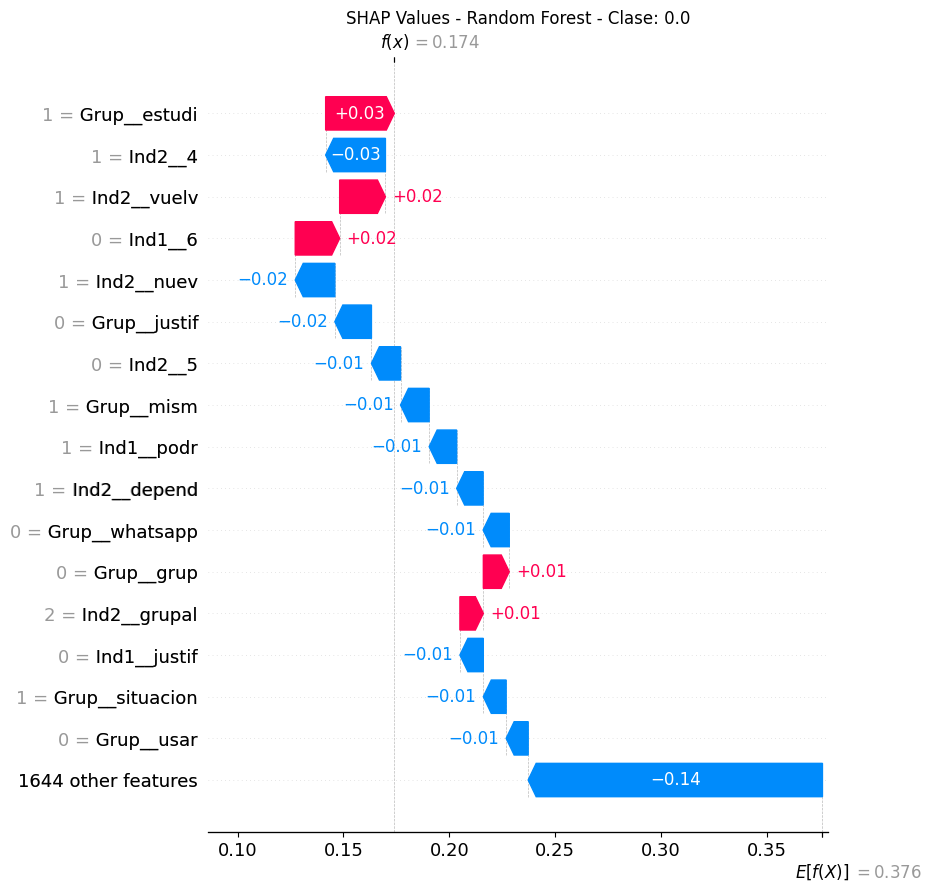

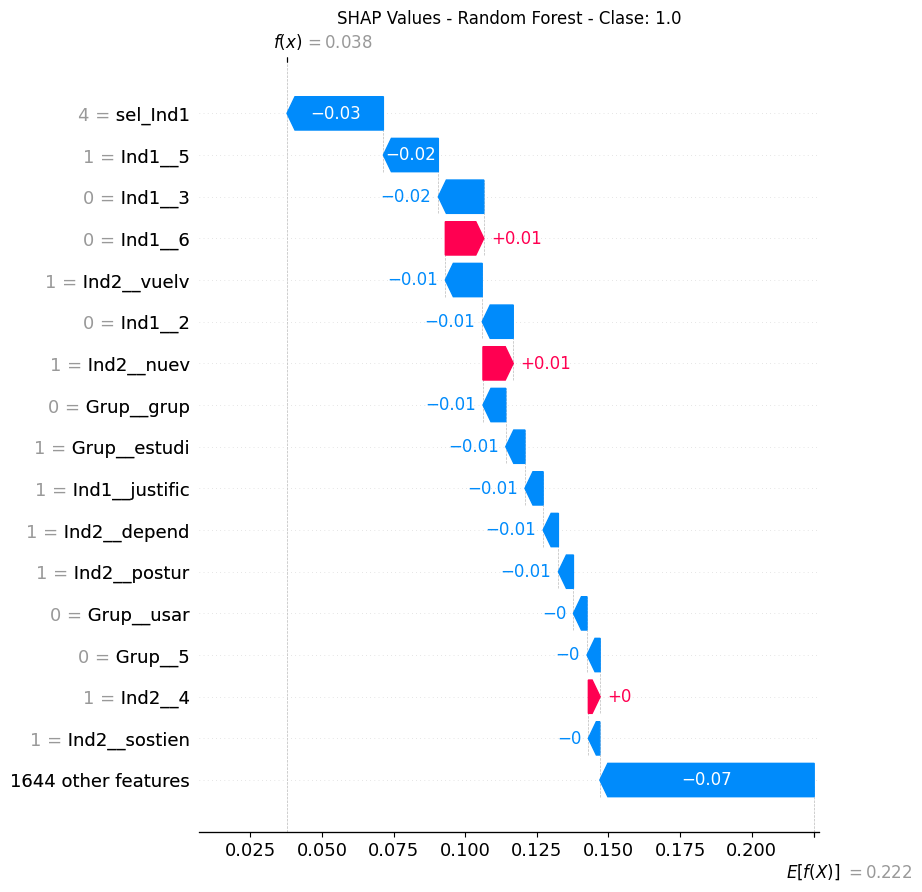

In [12]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[19:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


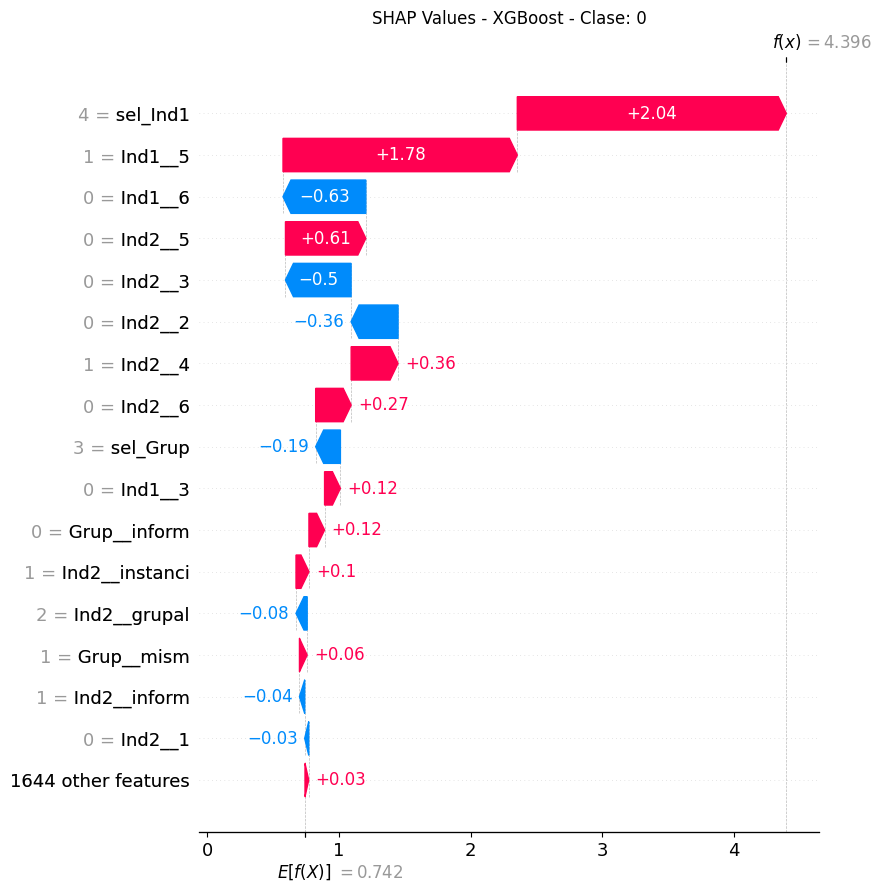

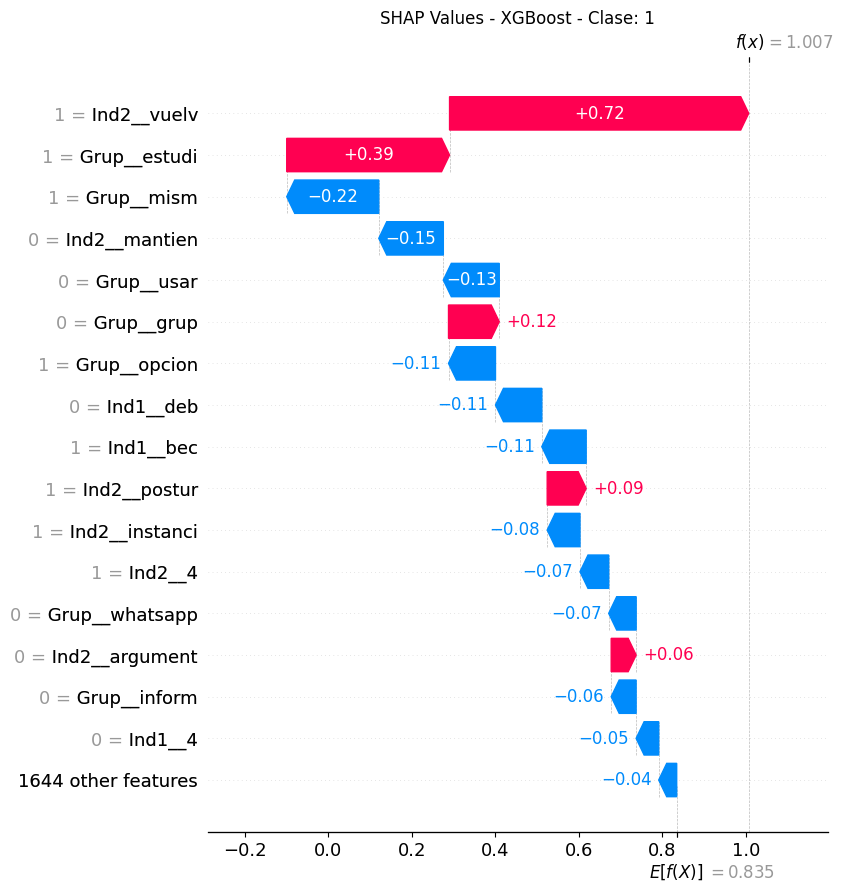

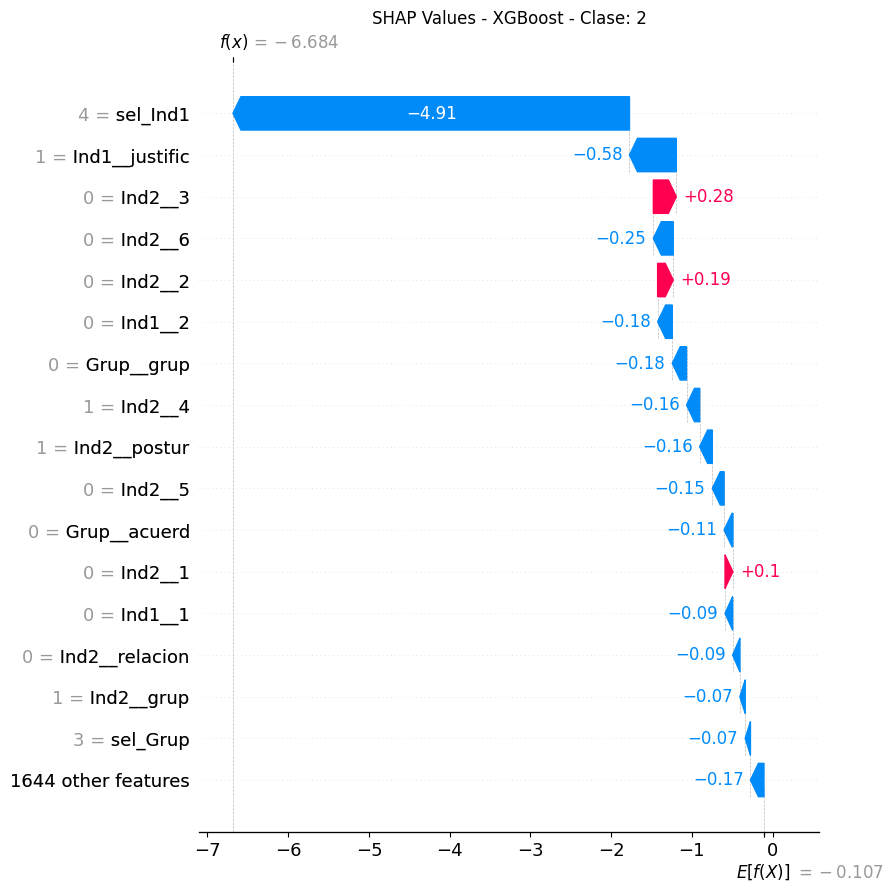

In [13]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 2. Agregar género

In [ ]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=True, 
    comment_Ind2=True, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  gender:M  gender:F  gender:O  Ind1__1  Ind1__10  \
229       5.0       1.0       1.0       0.0       0.0        0         0   
700       4.0       4.0       0.0       1.0       0.0        0         0   
572       5.0       4.0       1.0       0.0       0.0        0         0   
436       1.0       1.0       1.0       0.0       0.0        0         0   
124       3.0       3.0       1.0       0.0       0.0        0         0   
..        ...       ...       ...       ...       ...      ...       ...   
26        5.0       3.0       1.0       0.0       0.0        0         0   
340       3.0       3.0       1.0       0.0       0.0        0         0   
17        0.0       3.0       1.0       0.0       0.0        0         0   
667       1.0       2.0       1.0       0.0       0.0        0         0   
608       0.0       4.0       0.0       1.0       0.0        0         0   

     Ind1__100  Ind1__110  Ind1__2  ...  Chat__yaaa  Chat__yaap  Chat__yap  \
229          0          0        0  ...           0           0          0   
700          0          0        0  ...           0           0          0   
572          0          0        0  ...           0           0          0   
436          0          0        0  ...           0           0          0   
124          0          0        0  ...           0           0          0   
..         ...        ...      ...  ...         ...         ...        ...   
26           0          0        0  ...           0           0          0   
340          0          0        0  ...           0           0          0   
17           0          0        0  ...           0           0          0   
667          0          0        0  ...           0           0          0   
608          0          0        0  ...           0           0          0   

     Chat__yay  Chat__yend  Chat__yer  Chat__yes  Chat__yesss  Chat__yop  \
229          0           0          0          0            0          0   
700          0           0          0          0            0          0   
572          0           0          0          0            0          0   
436          0           0          1          0            0          0   
124          0           0          0          0            0          0   
..         ...         ...        ...        ...          ...        ...   
26           0           0          0          0            0          0   
340          0           0          0          0            0          0   
17           0           0          0          0            0          0   
667          0           0          0          0            0          0   
608          0           0          0          0            0          0   

     Chat__zapat  
229            0  
700            0  
572            0  
436            0  
124            0  
..           ...  
26             0  
340            0  
17             0  
667            0  
608            0  

[563 rows x 5891 columns]

In [ ]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2']),
                                ('gender',
                                 Pipeline(steps=[('extract',
                                                  ColumnExtractor(columns=['gender'])),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(categories=[['M',
                                                                             'F',
                                                                             'O']],
                                                                sparse_output=False))]),
                                 ['gender'])])

In [ ]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94212A40>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94212A40>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94212A40>),
                                 'comment_Ind2'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94212A40>),
                                 'summary')])

In [ ]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57        56
         0.0       0.00      0.00      0.00        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.40       141
   macro avg       0.13      0.33      0.19       141
weighted avg       0.16      0.40      0.23       141

Random Forest classifier
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

        -1.0       0.55      0.79      0.65        56
         0.0       0.43      0.48      0.46        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.50       141
   macro avg       0.33      0.42      0.37       141
weighted avg       0.38      0.50      0.43       141

XGBoost classifier
Best Hyperparameters: {'max_leaves': 100, 'min_child_weight': 3, 'n_e

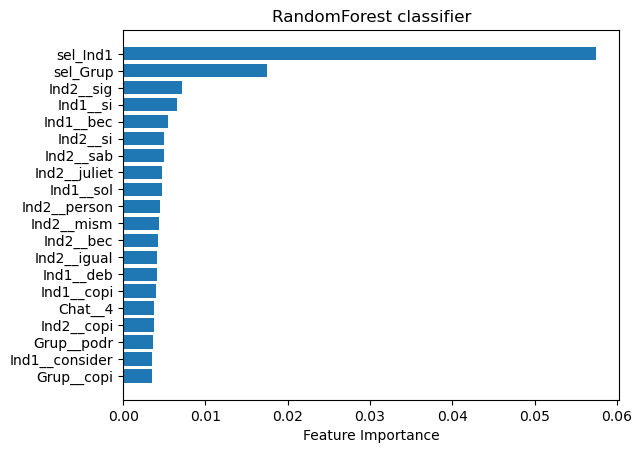

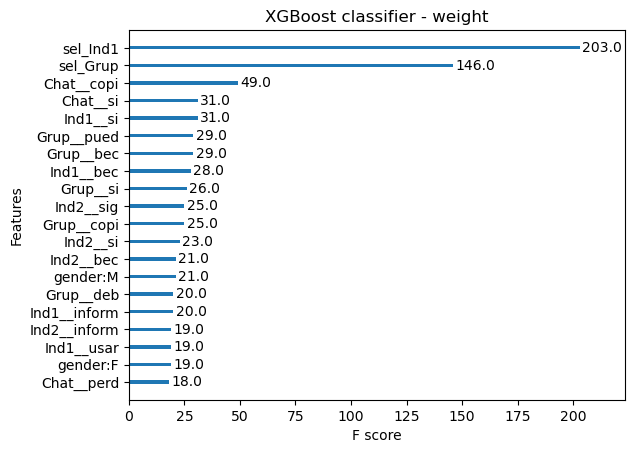

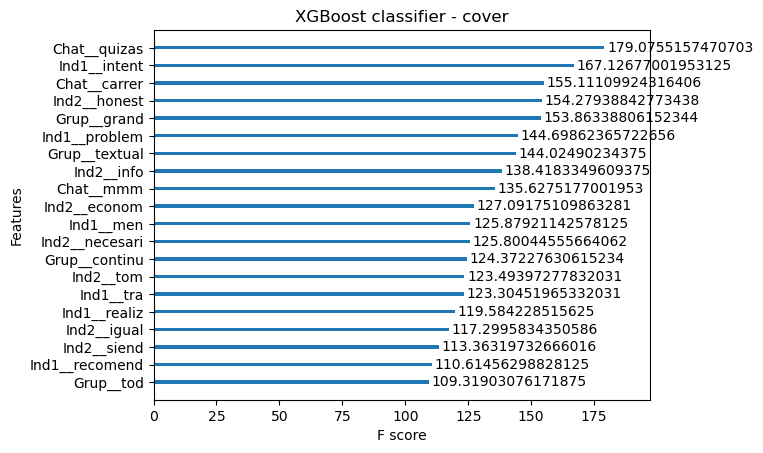

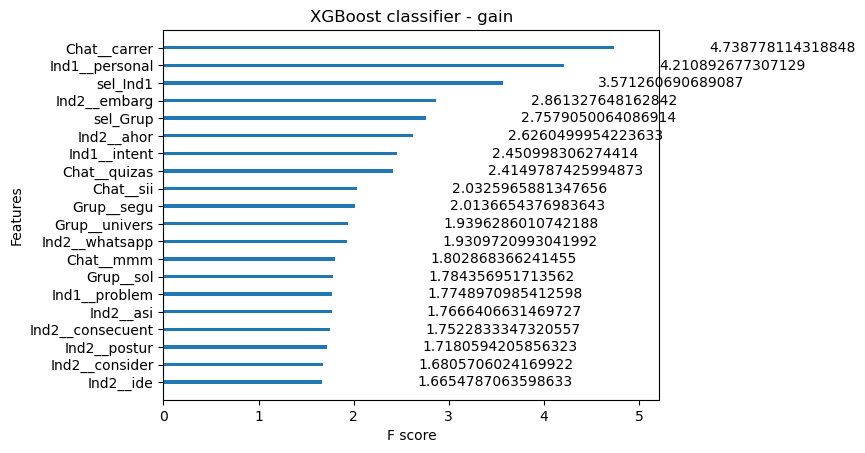

In [ ]:
plot_importance_models(rf_best_model, xgb_best_model)

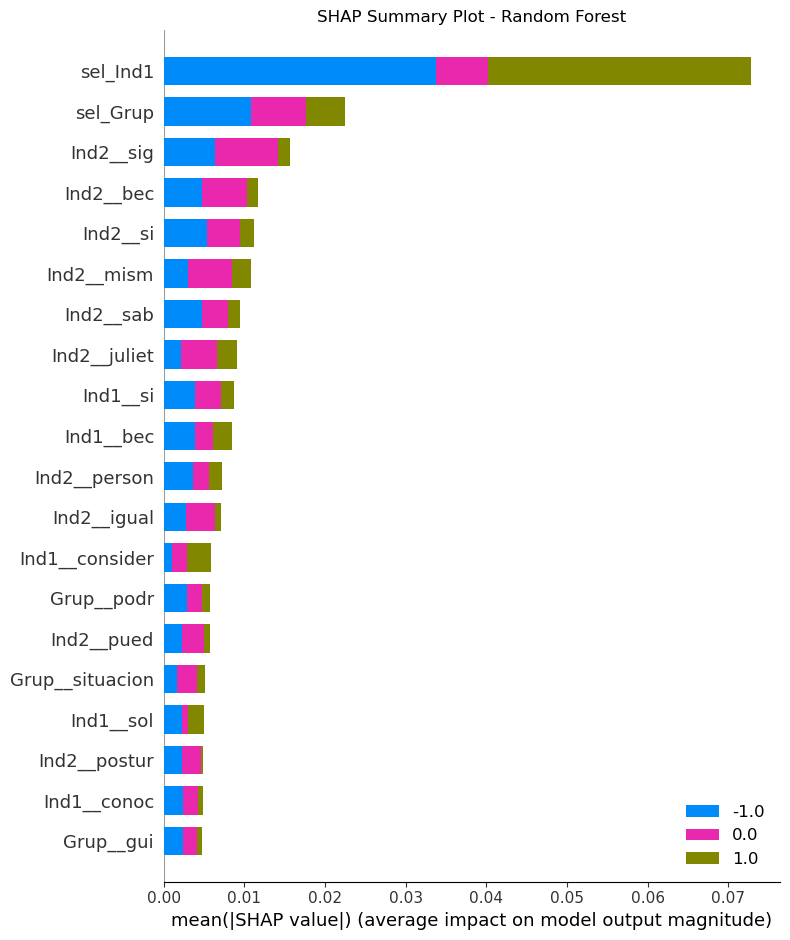

In [ ]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[03:24:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


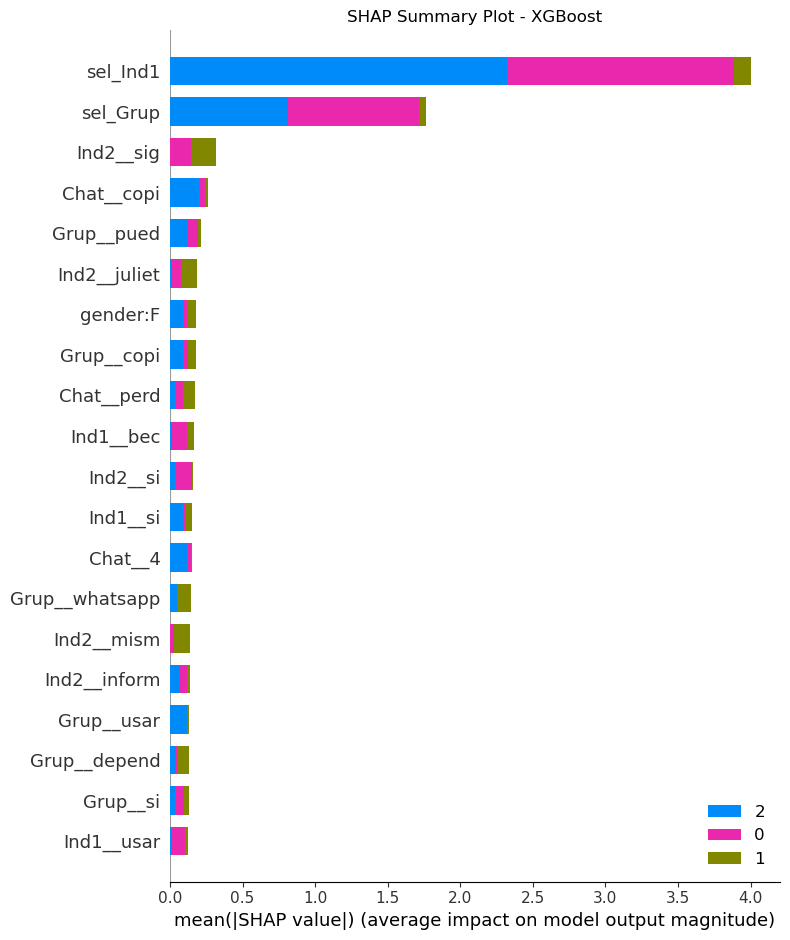

In [ ]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

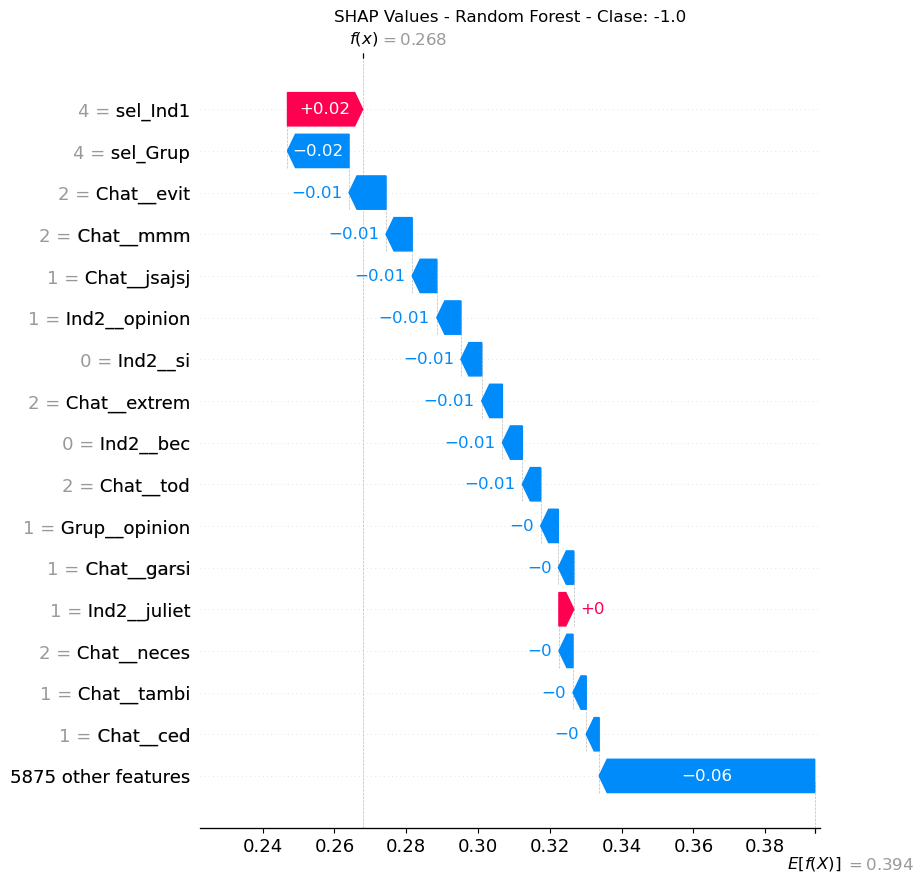

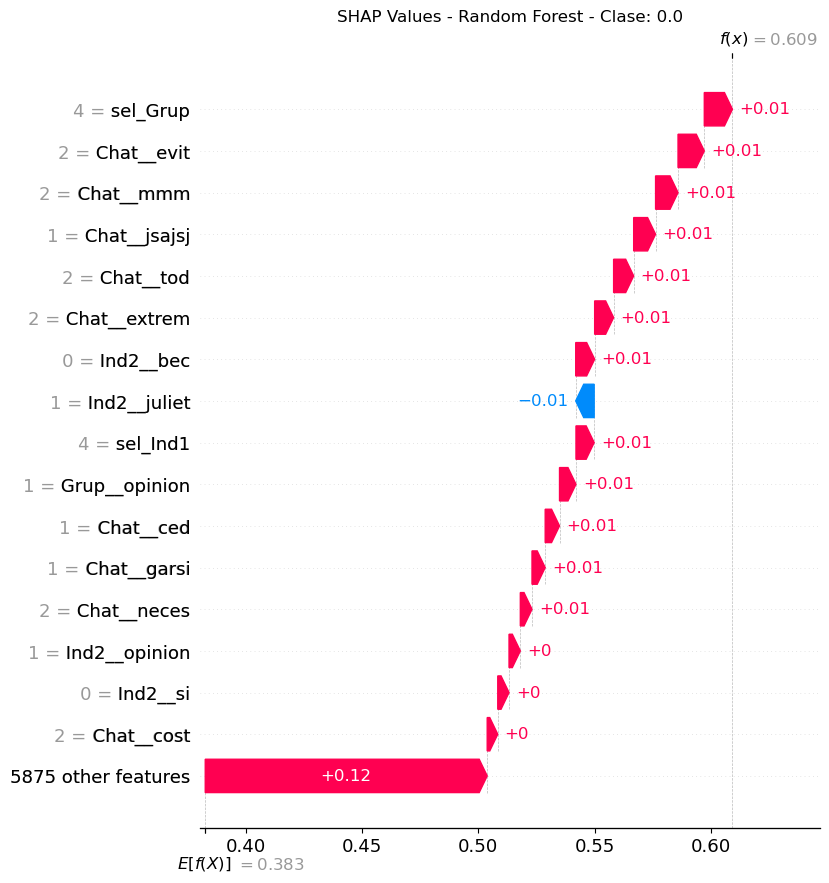

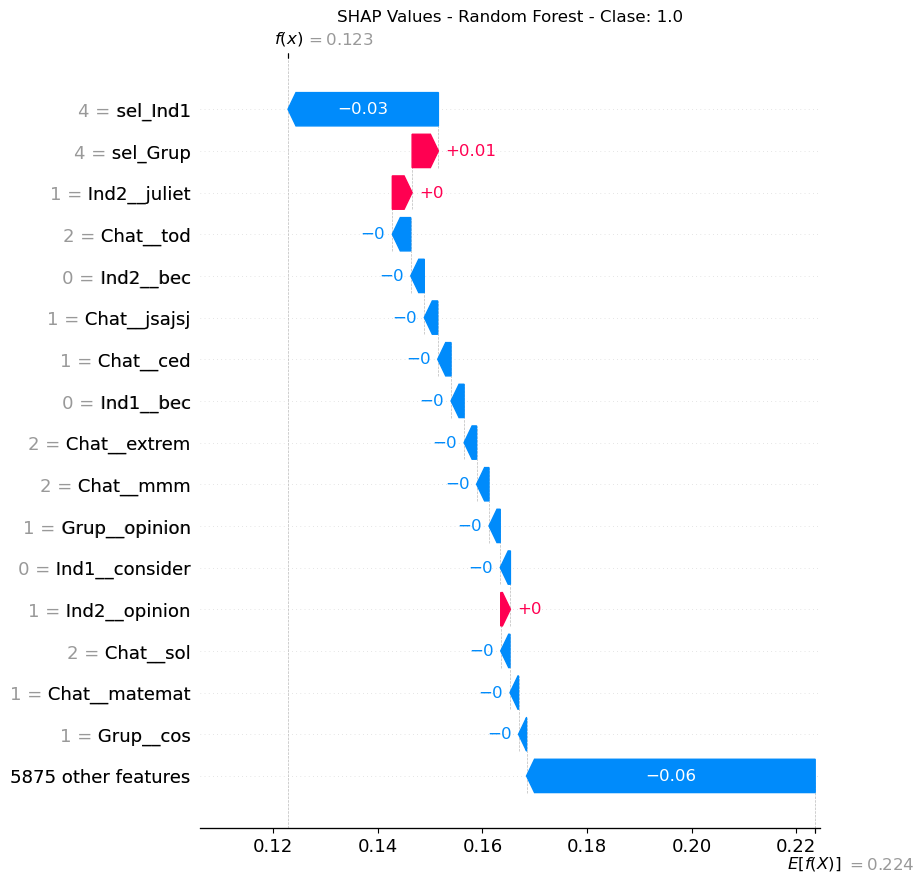

In [ ]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[03:24:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


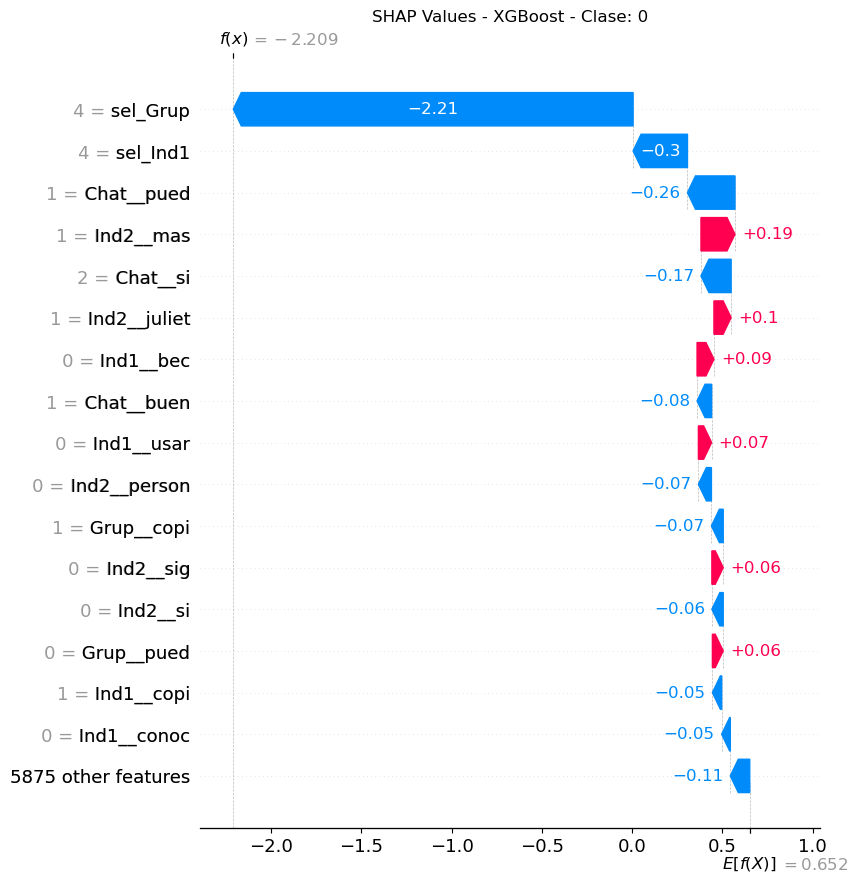

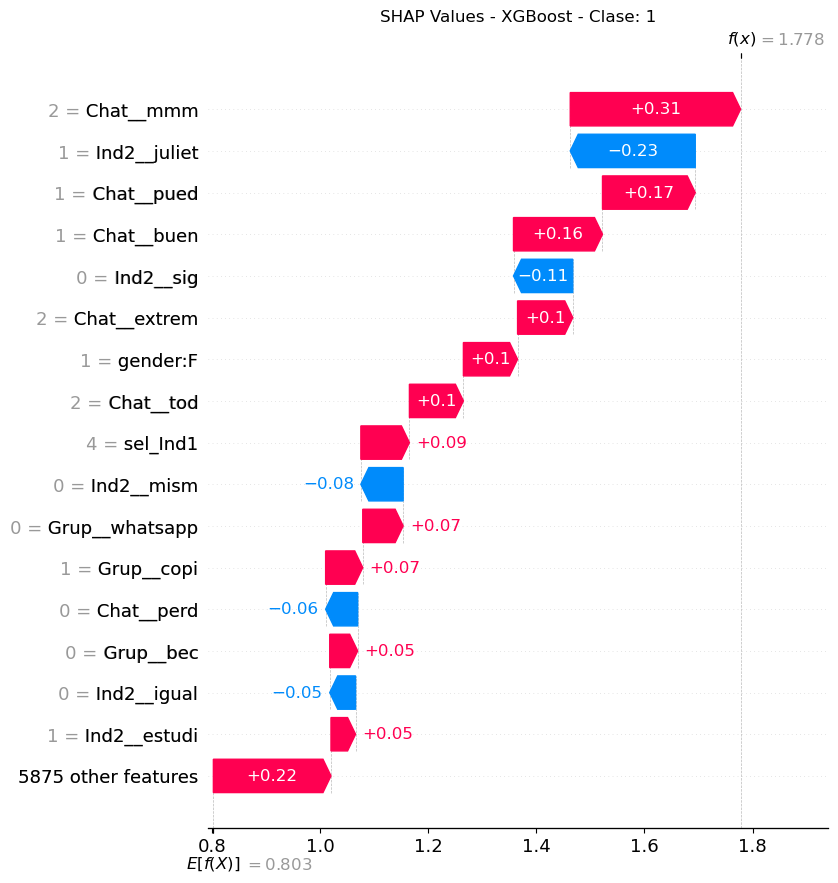

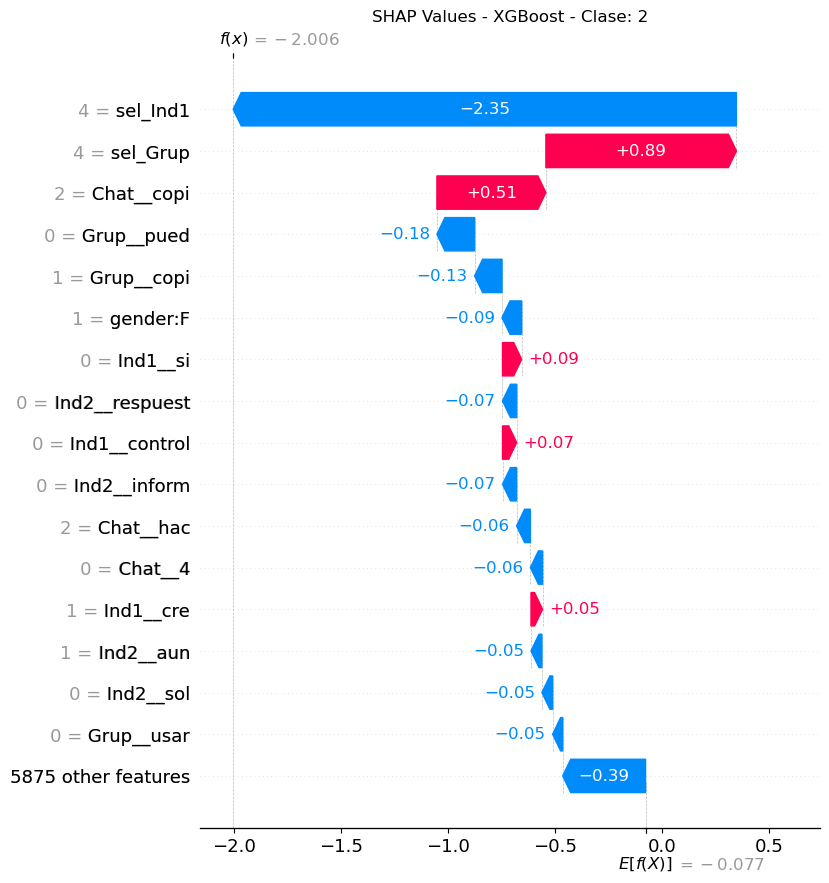

In [ ]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 3. Quitar selección 1

In [14]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=False, 
    comment_Ind2=True, 
    sel_Ind1=False
)
df_train

sel_Grup  Ind1__1  Ind1__2  Ind1__3  Ind1__4  Ind1__5  Ind1__6  \
686       3.0        0        0        0        0        1        0   
556       3.0        0        0        0        0        1        0   
229       3.0        0        0        0        1        0        0   
479       4.0        0        0        0        0        0        1   
695       4.0        0        0        1        0        0        0   
..        ...      ...      ...      ...      ...      ...      ...   
284       3.0        0        0        0        0        1        0   
55        4.0        0        1        0        0        0        0   
543       4.0        0        0        0        0        0        1   
653       4.0        0        0        0        0        1        0   
148       2.0        0        1        0        0        0        0   

     Ind1__acces  Ind1__accion  Ind1__acept  ...  Ind2__vid  Ind2__viend  \
686            0             0            0  ...          0            0   
556            0             0            0  ...          0            0   
229            0             0            0  ...          0            0   
479            0             0            0  ...          0            0   
695            0             0            0  ...          0            0   
..           ...           ...          ...  ...        ...          ...   
284            0             0            0  ...          0            0   
55             0             0            0  ...          0            0   
543            0             0            0  ...          0            0   
653            0             0            0  ...          0            0   
148            0             0            0  ...          0            0   

     Ind2__vio  Ind2__vision  Ind2__vist  Ind2__volv  Ind2__vot  Ind2__vuelv  \
686          0             0           0           0          0            1   
556          0             0           0           0          0            1   
229          0             0           0           0          0            1   
479          0             0           0           0          0            1   
695          0             0           0           0          0            1   
..         ...           ...         ...         ...        ...          ...   
284          0             0           0           0          0            1   
55           0             0           0           0          0            0   
543          0             0           0           0          0            1   
653          0             0           0           0          0            1   
148          0             0           0           0          0            1   

     Ind2__whatsapp  Ind2__whatsappn  
686               1                0  
556               1                0  
229               0                0  
479               1                0  
695               0                0  
..              ...              ...  
284               1                0  
55                1                0  
543               1                0  
653               1                0  
148               0                0  

[588 rows x 1659 columns]

In [15]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2'])])

In [16]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000013202980BB0>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000013202980BB0>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000013202980BB0>),
                                 'comment_Ind2')])

In [17]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57        59
         0.0       0.00      0.00      0.00        56
         1.0       0.00      0.00      0.00        33

    accuracy                           0.40       148
   macro avg       0.13      0.33      0.19       148
weighted avg       0.16      0.40      0.23       148

Random Forest classifier
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

        -1.0       0.85      0.88      0.87        59
         0.0       0.75      0.91      0.82        56
         1.0       0.95      0.55      0.69        33

    accuracy                           0.82       148
   macro avg       0.85      0.78      0.79       148
weighted avg       0.83      0.82      0.81       148

XGBoost classifier
Best Hyperparameters: {'max_leaves': 5, 'min_child_weight': 1, 'n_est

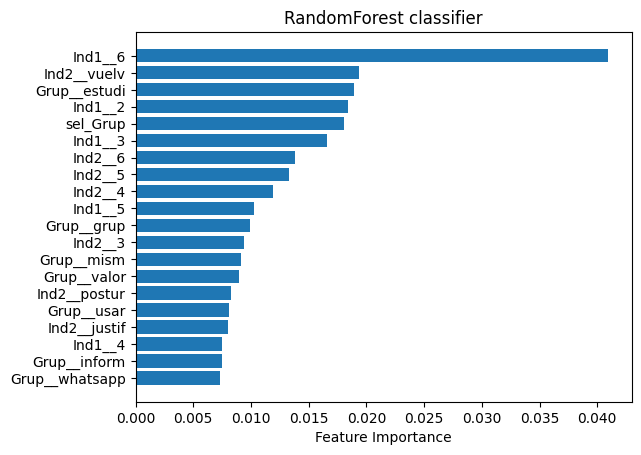

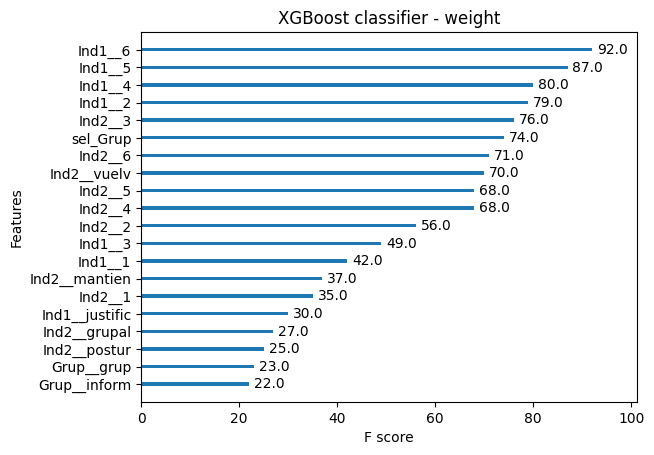

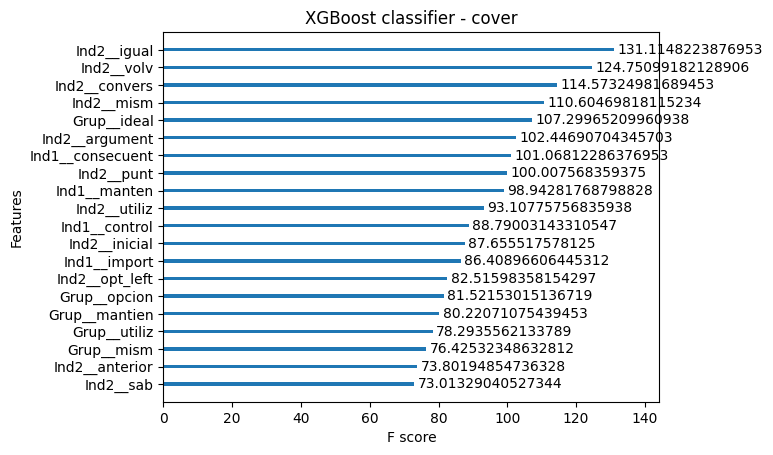

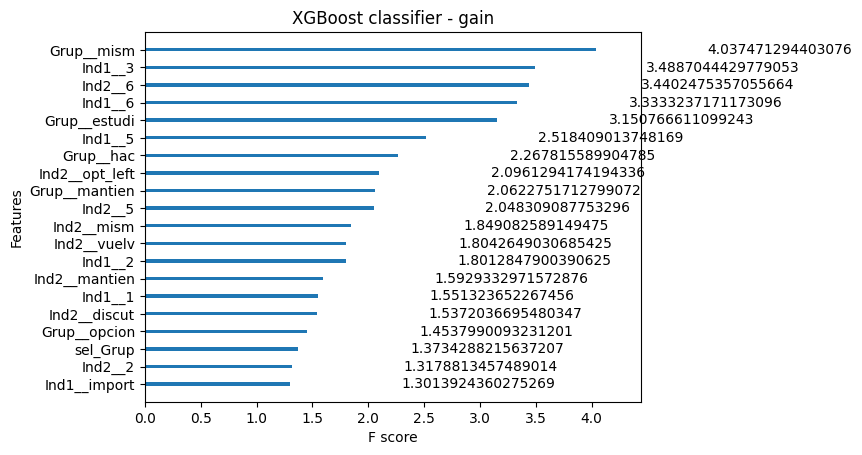

In [18]:
plot_importance_models(rf_best_model, xgb_best_model)

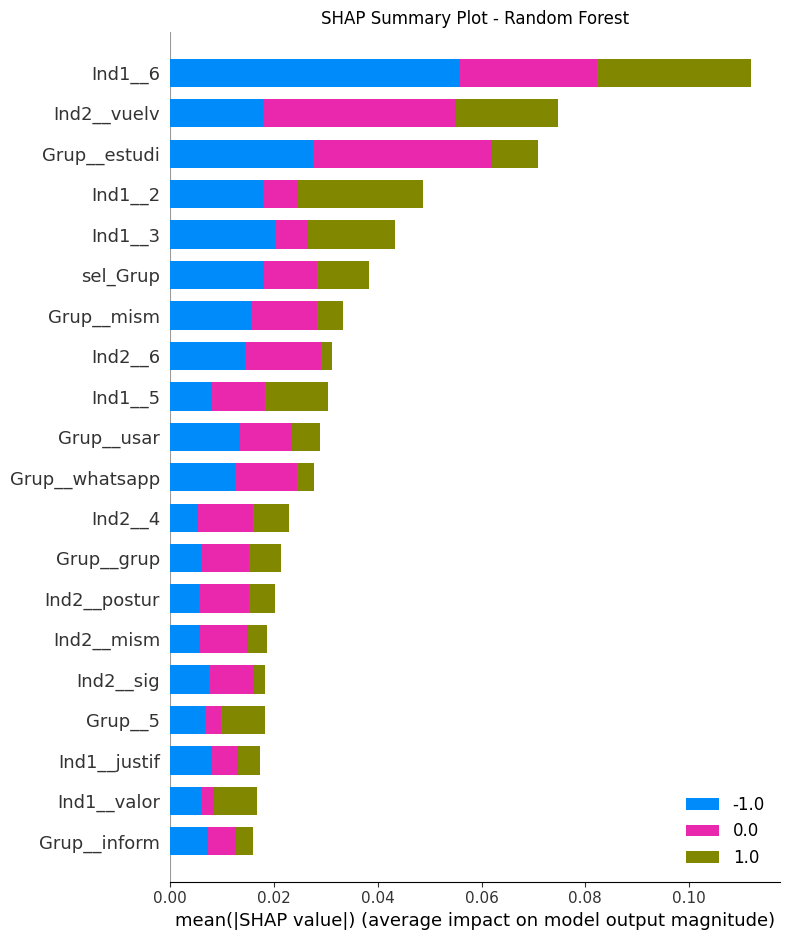

In [19]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[19:22:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


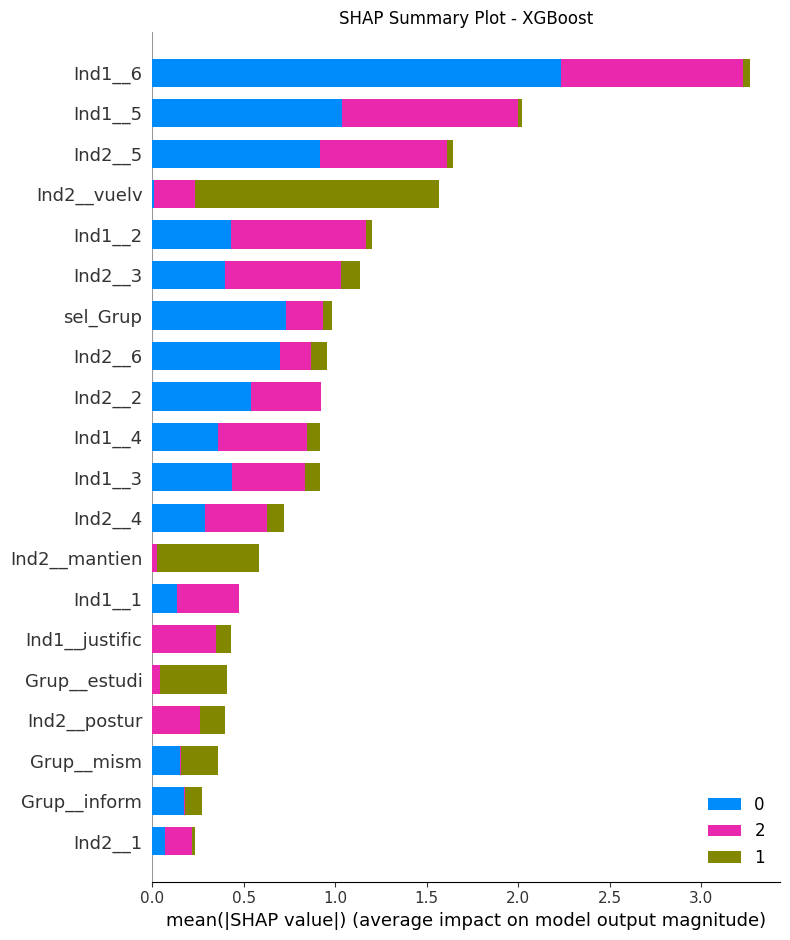

In [20]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

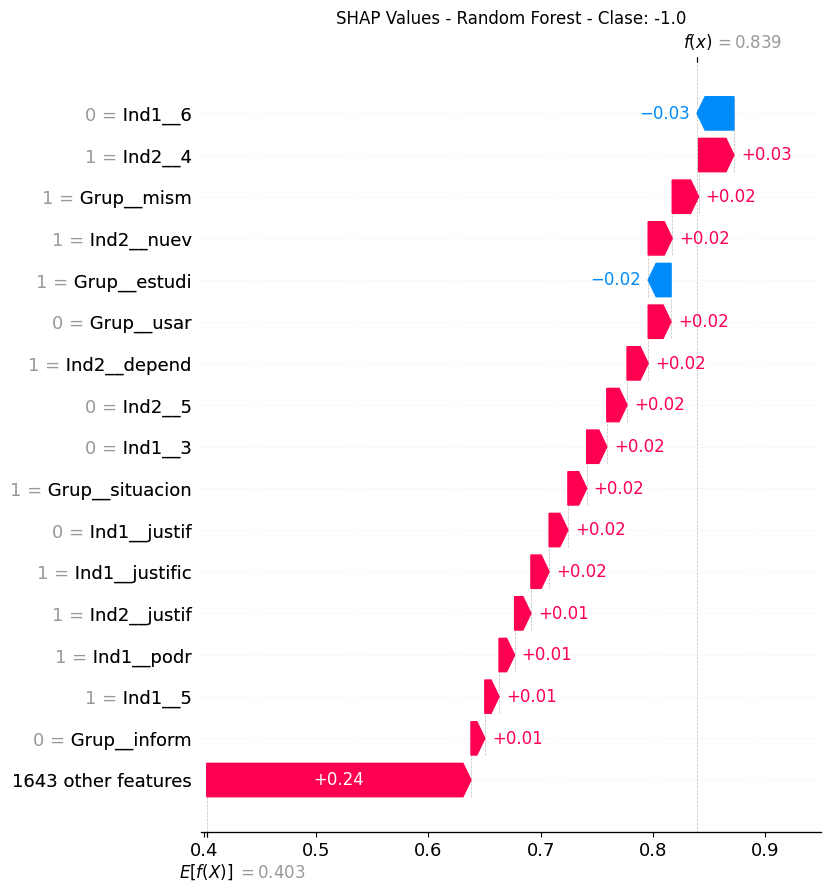

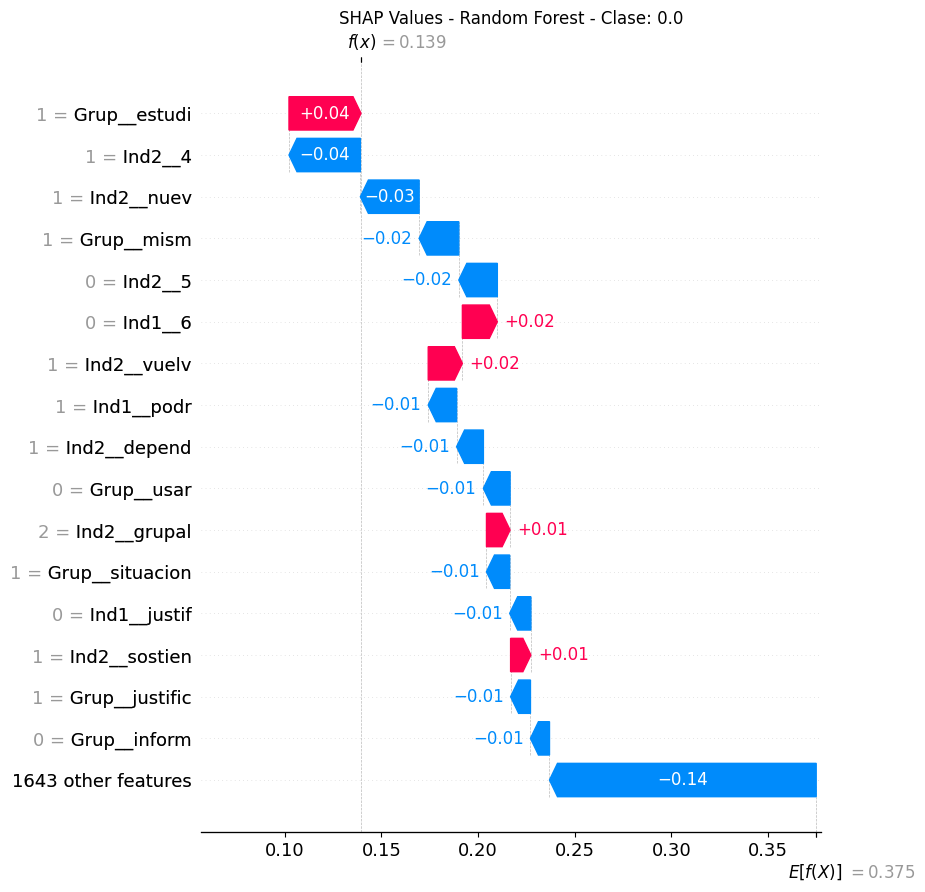

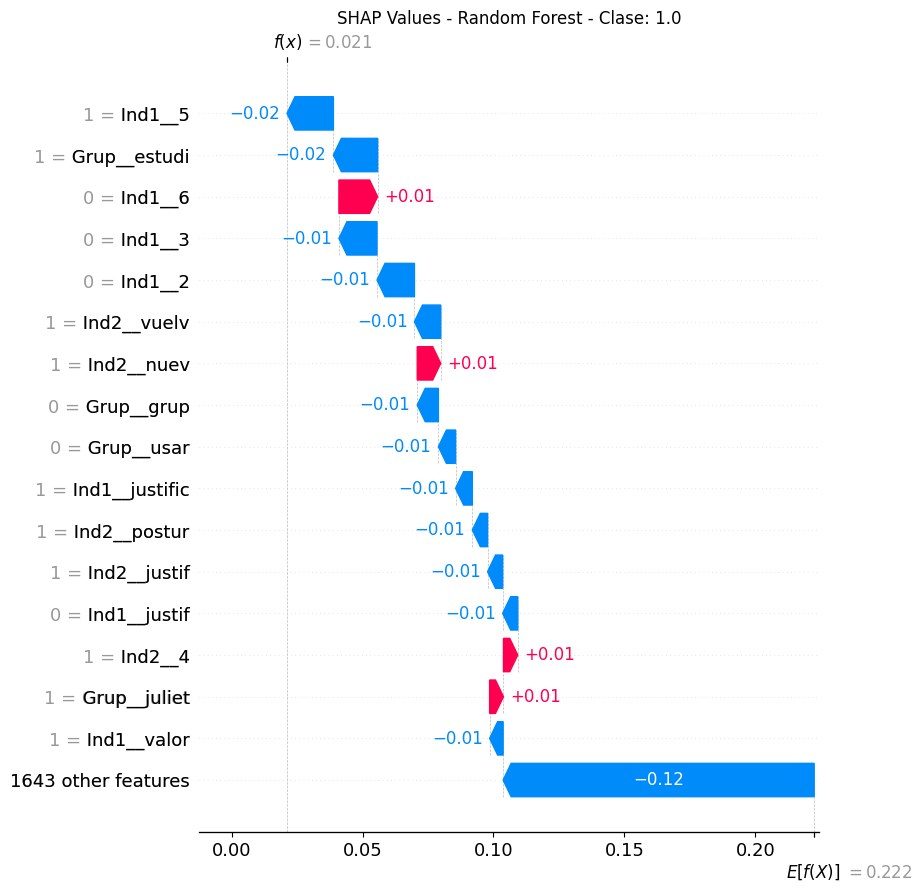

In [21]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[19:23:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


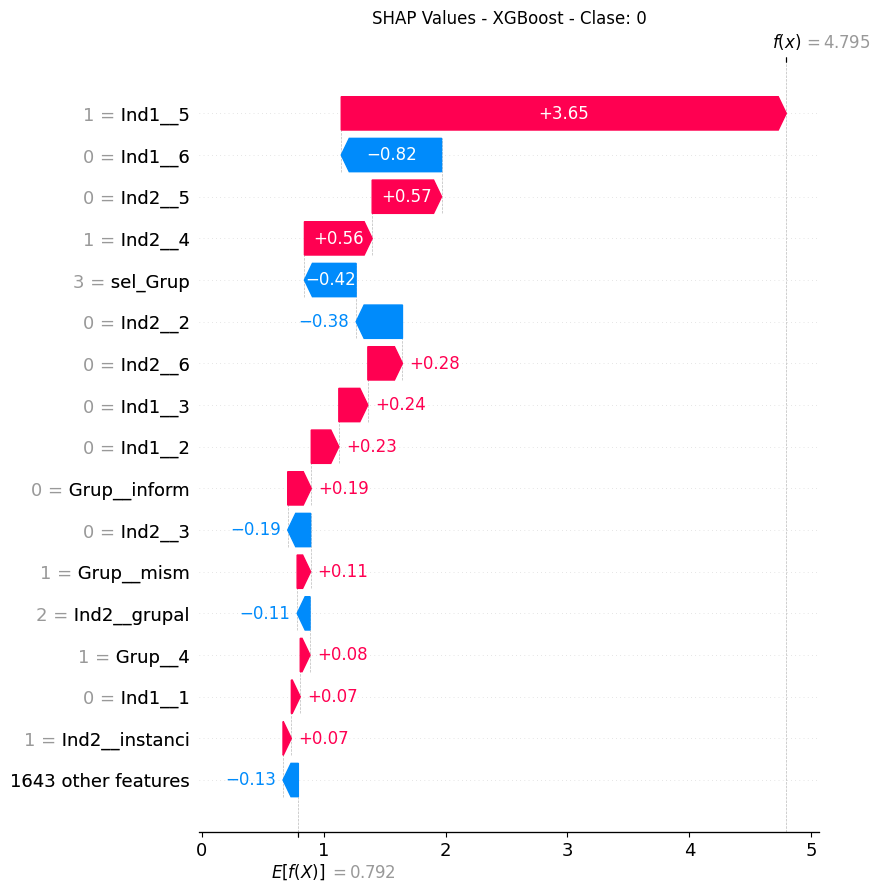

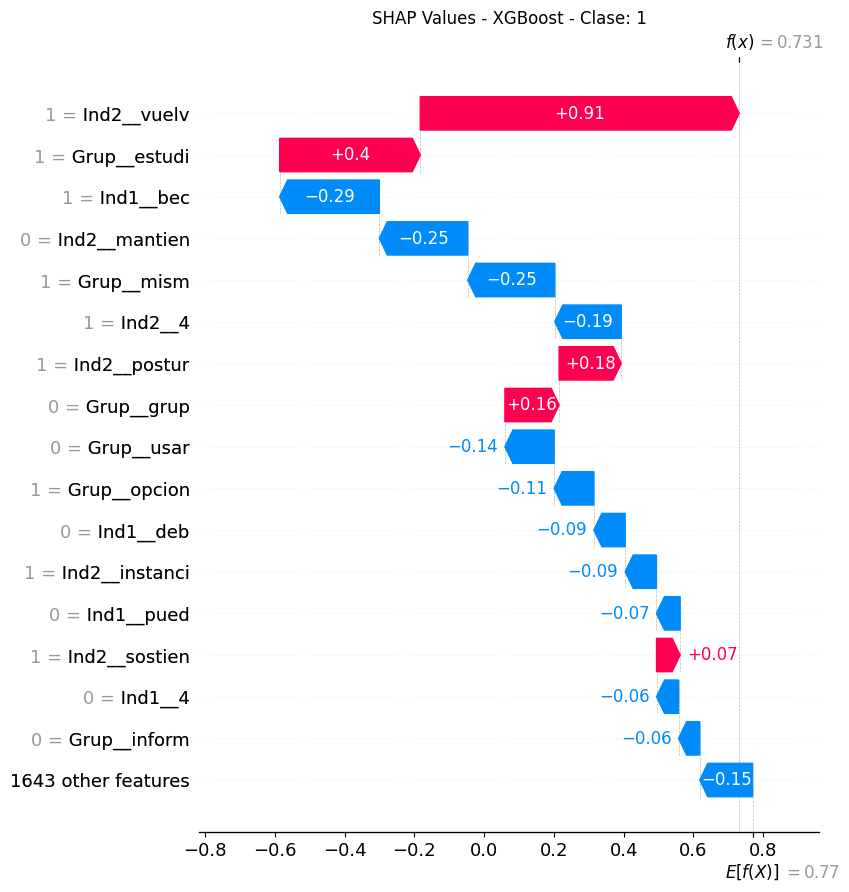

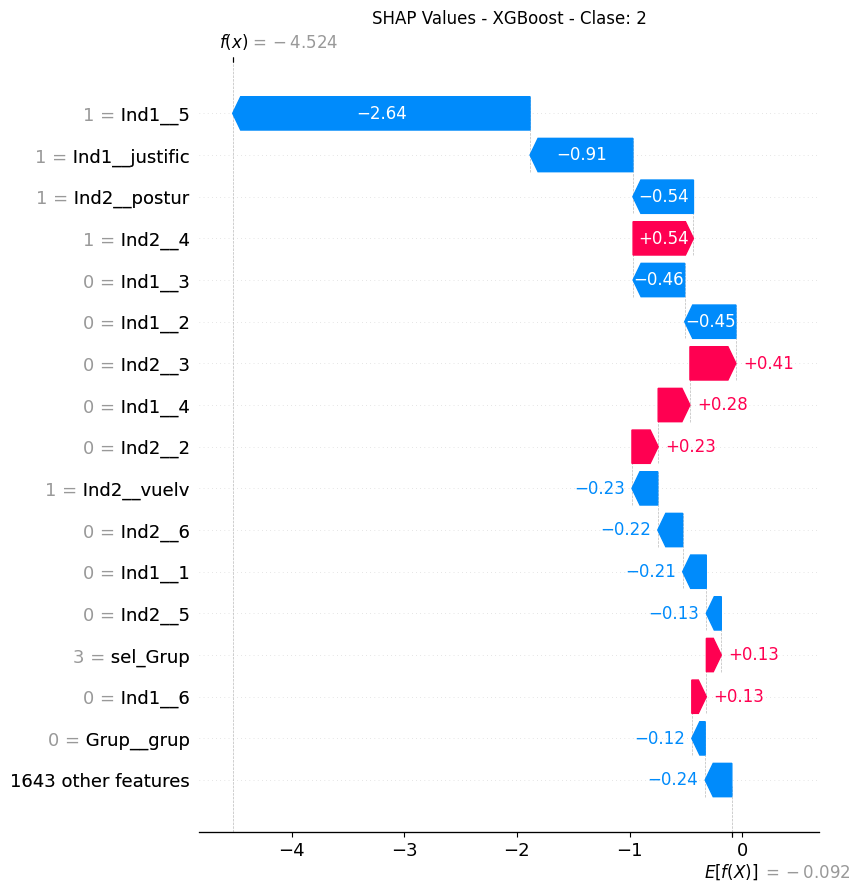

In [22]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 4. Quitar justificación individual 2

In [23]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=False, 
    comment_Ind2=False, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  Ind1__1  Ind1__2  Ind1__3  Ind1__4  Ind1__5  Ind1__6  \
686       4.0       3.0        0        0        0        0        1        0   
556       4.0       3.0        0        0        0        0        1        0   
229       3.0       3.0        0        0        0        1        0        0   
479       5.0       4.0        0        0        0        0        0        1   
695       2.0       4.0        0        0        1        0        0        0   
..        ...       ...      ...      ...      ...      ...      ...      ...   
284       4.0       3.0        0        0        0        0        1        0   
55        1.0       4.0        0        1        0        0        0        0   
543       5.0       4.0        0        0        0        0        0        1   
653       4.0       4.0        0        0        0        0        1        0   
148       1.0       2.0        0        1        0        0        0        0   

     Ind1__acces  Ind1__accion  ...  Grup__verific  Grup__vers  Grup__vez  \
686            0             0  ...              0           0          0   
556            0             0  ...              0           0          0   
229            0             0  ...              0           0          0   
479            0             0  ...              0           0          0   
695            0             0  ...              0           0          0   
..           ...           ...  ...            ...         ...        ...   
284            0             0  ...              0           0          0   
55             0             0  ...              0           0          0   
543            0             0  ...              0           0          0   
653            0             0  ...              0           0          0   
148            0             0  ...              0           0          0   

     Grup__vid  Grup__viend  Grup__viol  Grup__virtud  Grup__vist  Grup__viv  \
686          0            0           0             0           0          0   
556          0            0           0             0           0          0   
229          0            0           0             0           0          0   
479          0            0           0             0           0          0   
695          0            0           0             0           0          0   
..         ...          ...         ...           ...         ...        ...   
284          0            0           0             0           0          0   
55           0            0           0             0           0          0   
543          0            0           0             0           0          0   
653          0            0           0             0           0          0   
148          0            0           0             0           0          0   

     Grup__whatsapp  
686               0  
556               0  
229               0  
479               0  
695               0  
..              ...  
284               0  
55                1  
543               0  
653               0  
148               0  

[588 rows x 1095 columns]

In [24]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2'])])

In [25]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x00000132026541C0>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x00000132026541C0>),
                                 'comment_Grup')])

In [26]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57        59
         0.0       0.00      0.00      0.00        56
         1.0       0.00      0.00      0.00        33

    accuracy                           0.40       148
   macro avg       0.13      0.33      0.19       148
weighted avg       0.16      0.40      0.23       148



Random Forest classifier
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

        -1.0       0.83      0.88      0.85        59
         0.0       0.76      0.68      0.72        56
         1.0       0.80      0.85      0.82        33

    accuracy                           0.80       148
   macro avg       0.80      0.80      0.80       148
weighted avg       0.79      0.80      0.79       148

XGBoost classifier
Best Hyperparameters: {'max_leaves': 5, 'min_child_weight': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

        -1.0       0.79      0.85      0.82        59
         0.0       0.74      0.62      0.68        56
         1.0       0.76      0.88      0.82        33

    accuracy                           0.77       148
   macro avg       0.77      0.78      0.77       148
weighted avg       0.77      0.77      0.77       148



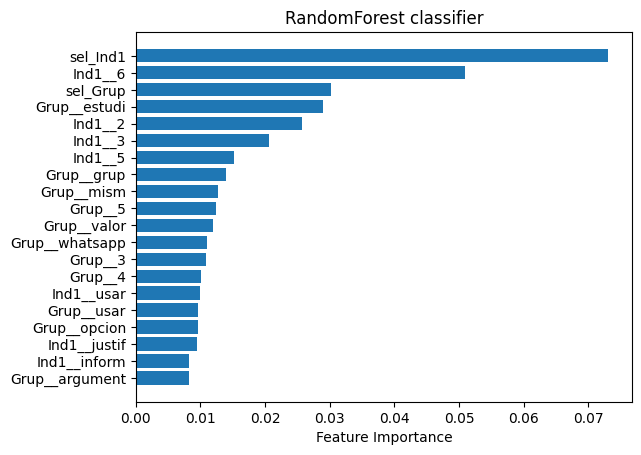

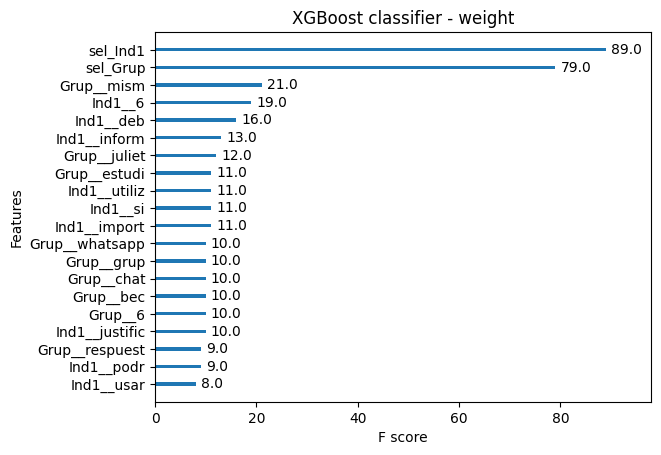

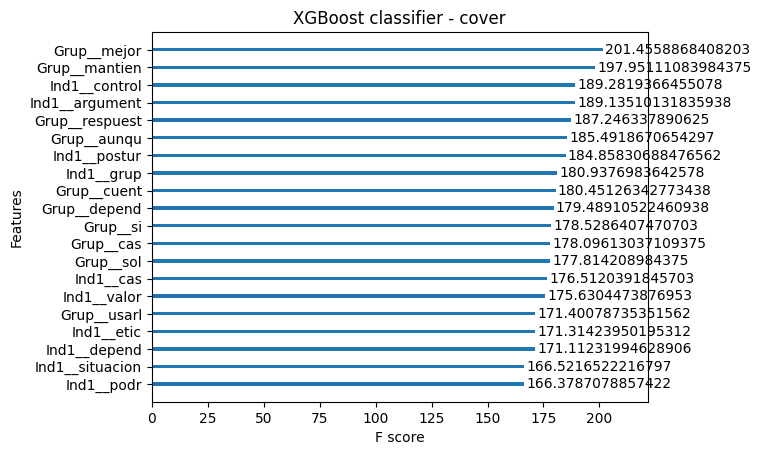

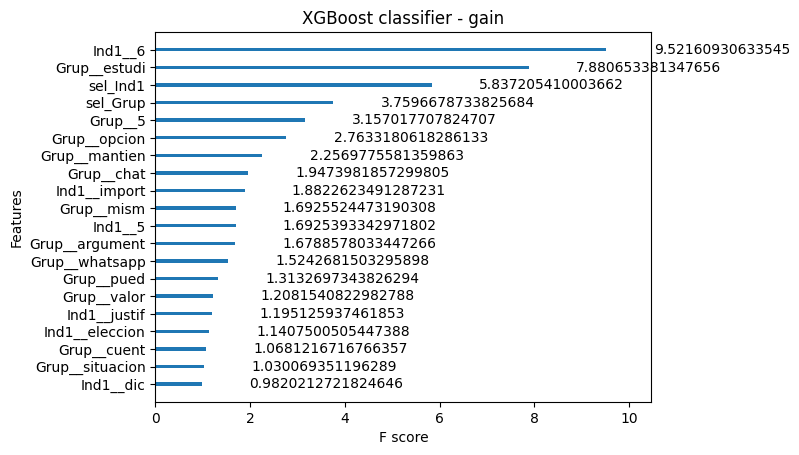

In [27]:
plot_importance_models(rf_best_model, xgb_best_model)

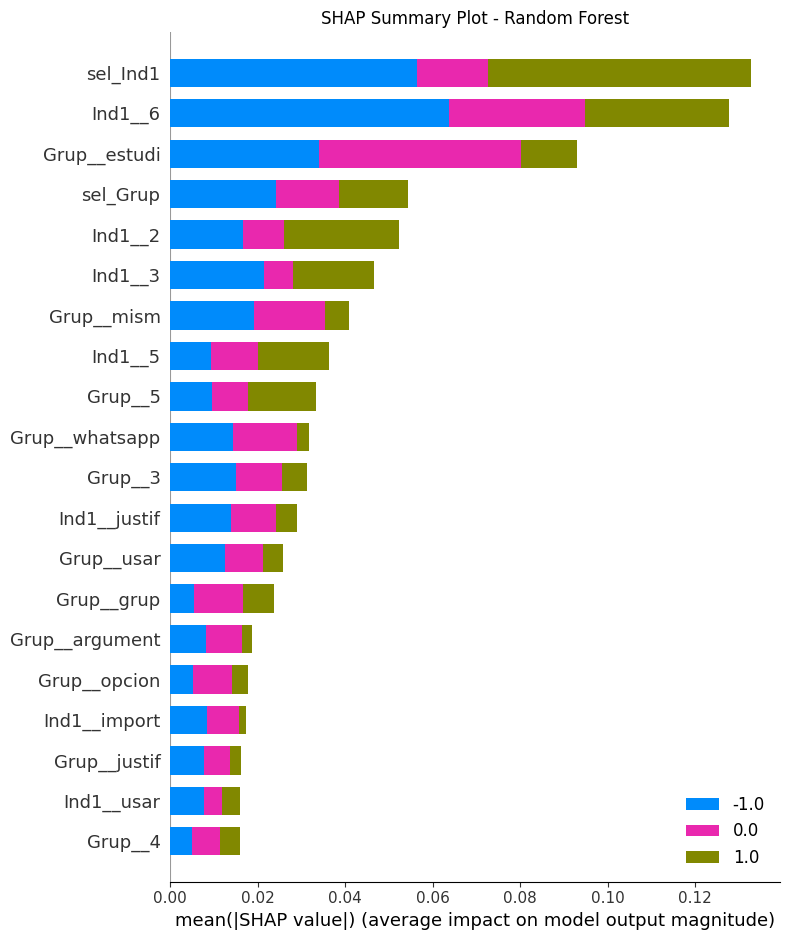

In [28]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[19:28:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


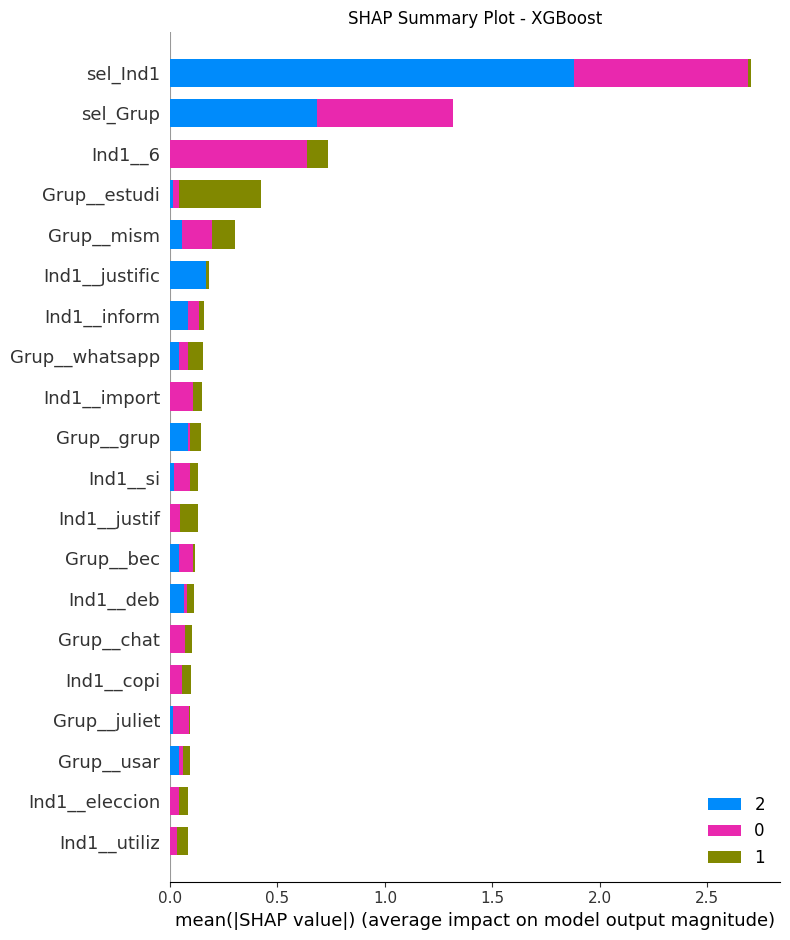

In [29]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

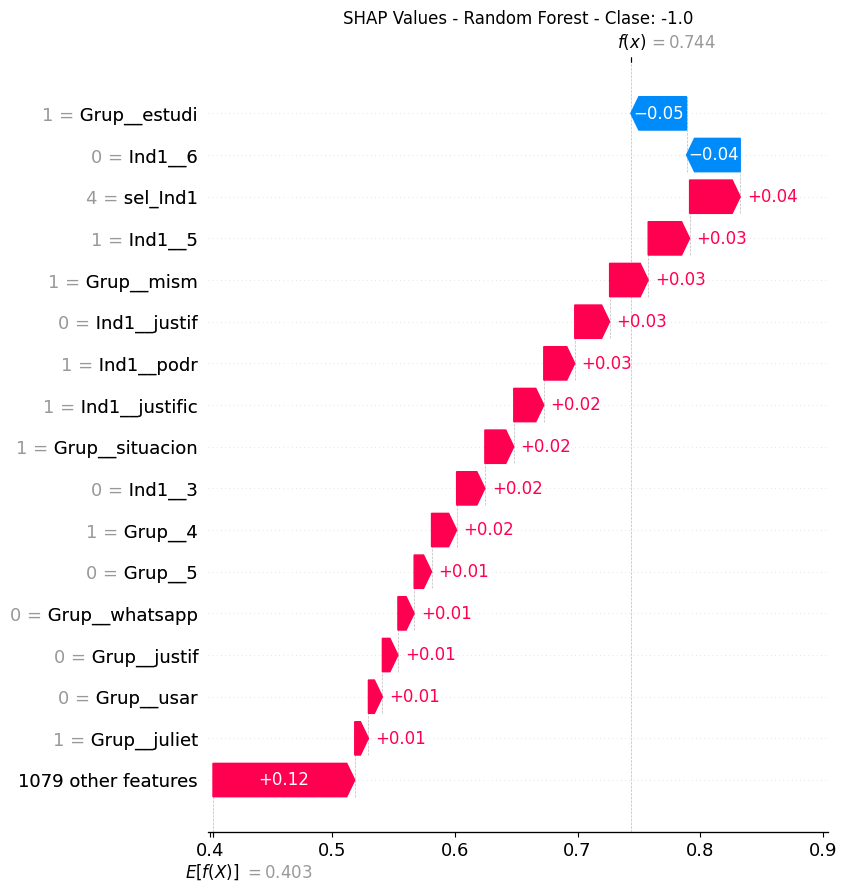

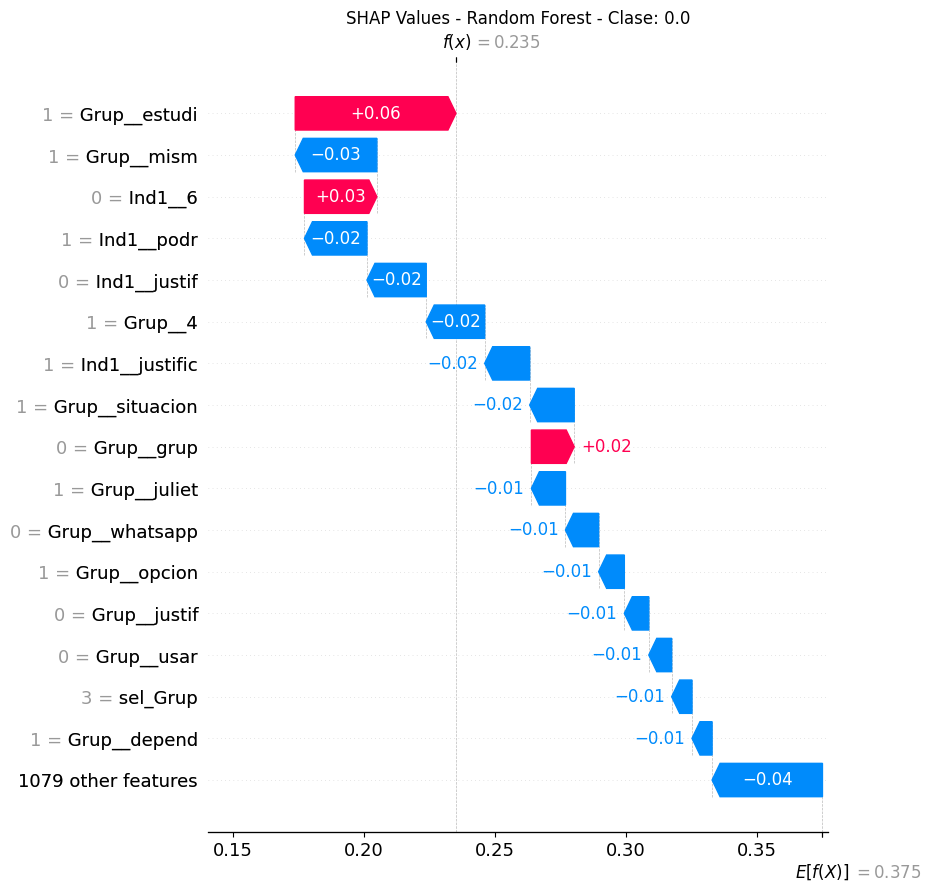

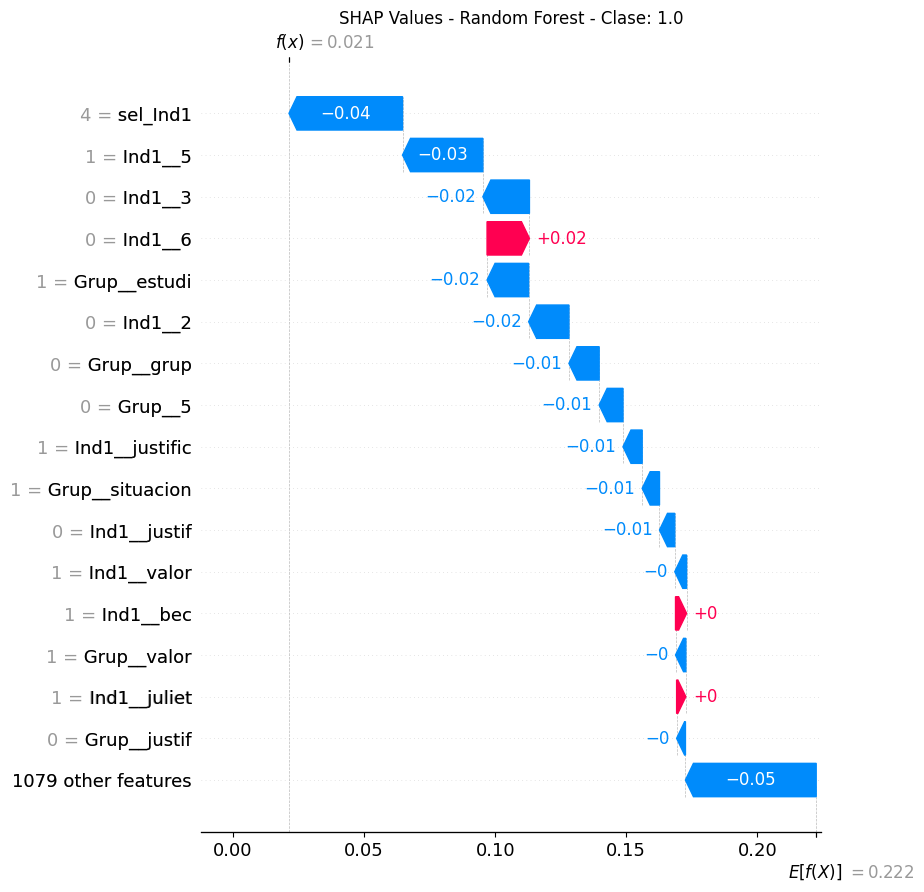

In [30]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[19:29:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


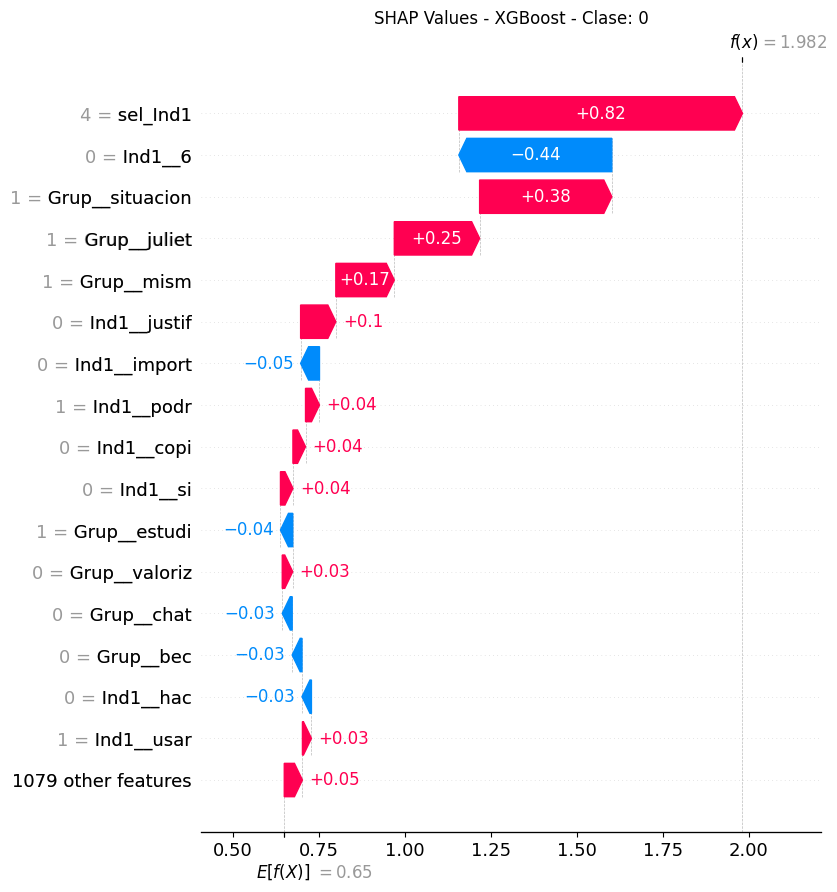

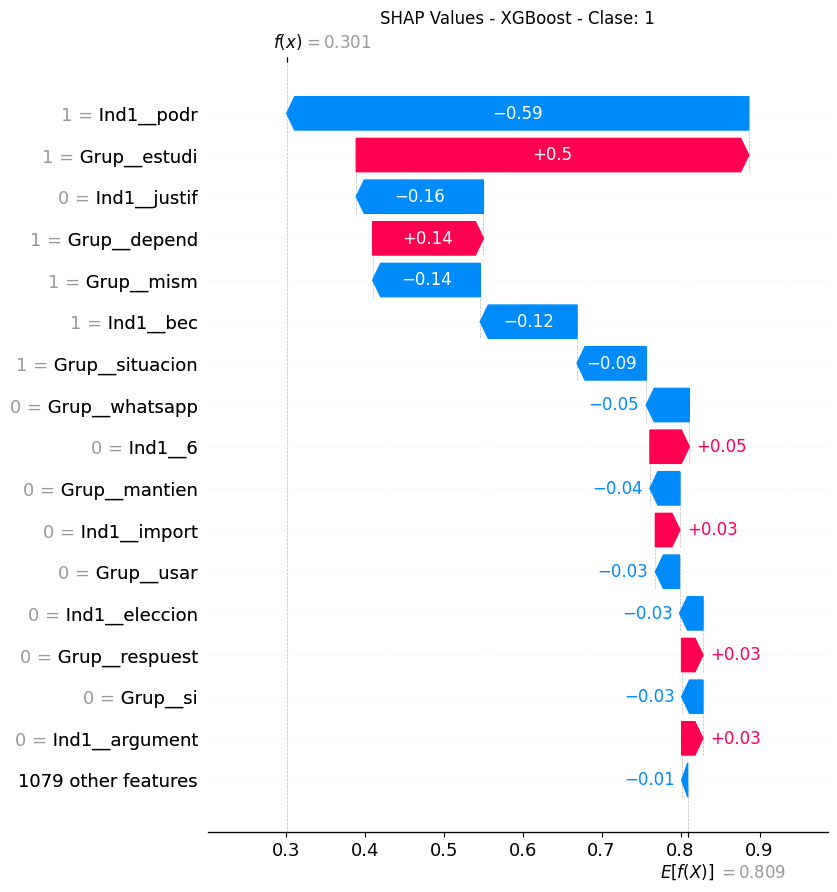

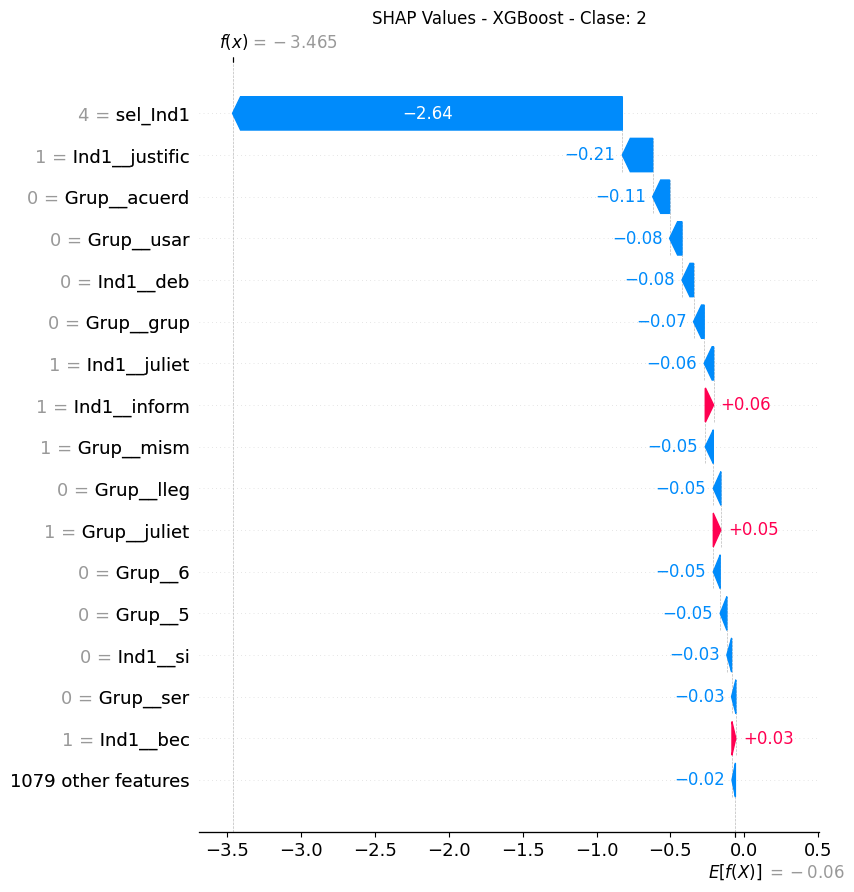

In [31]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')